In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Generate table entry of a single experiment.

In [8]:
logfile = "/home/pitcher/dev_ws/thesis_ws/active_search/src/active_search/logs/policy_log.csv"

# df = pd.read_csv(logfile)

# Step 1: Read the CSV file and organize the data with Pandas
df = pd.read_csv(logfile, header=None, names=['Action'])
df['Scene'] = df['Action'].str.extract(r'([^/]+.yaml)$')
df['Scene'].fillna(method='ffill', inplace=True)

df.info

<bound method DataFrame.info of              Action        Scene
0         succeeded          NaN
1         succeeded          NaN
2         succeeded          NaN
3         succeeded          NaN
4              view          NaN
..              ...          ...
597       succeeded  test_2.yaml
598          failed  test_2.yaml
599       succeeded  test_2.yaml
600  grasped target  test_2.yaml
601       test.yaml    test.yaml

[602 rows x 2 columns]>

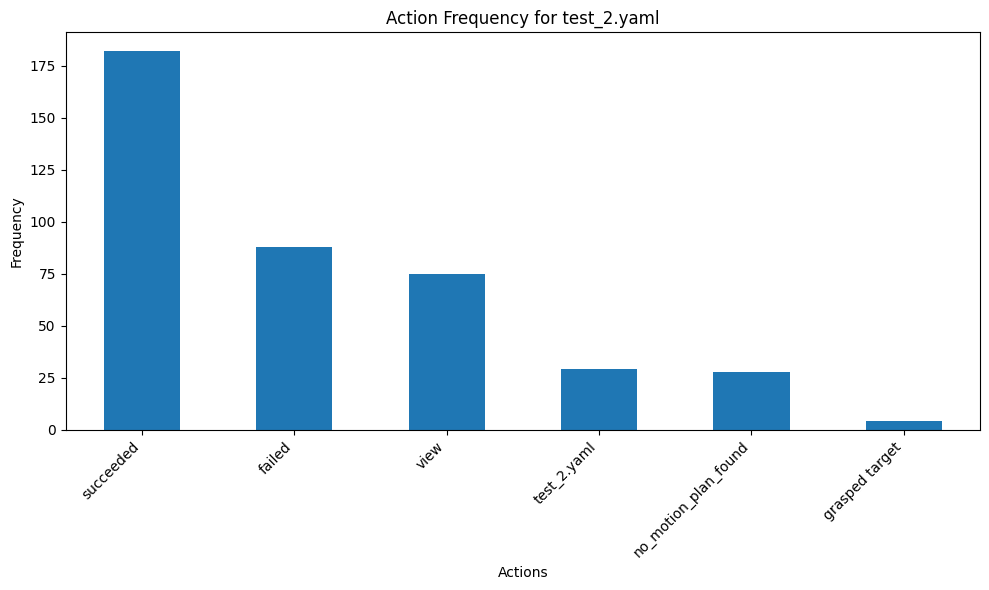

In [10]:

# Step 2: Count the action frequencies for 'test_2.yaml'
target_scene = 'test_2.yaml'
actions_df = df[df['Scene'] == target_scene]
action_counts = actions_df['Action'].value_counts()

# Step 3: Plot the data
action_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.title(f'Action Frequency for {target_scene}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# df = df[df.result != "no_motion_plan_found"]

# n_attempts = len(df.index)
# n_succeeded = (df.result == "succeeded").sum()
# n_failed = (df.result == "failed").sum()
# n_aborted = (df.result == "aborted").sum()

# views_mean = df.view_count.mean()
# views_std = df.view_count.std()

# search_time_mean = df.search_time.mean()
# search_time_std = df.search_time.std()

# total_time_mean = (df.search_time + df.grasp_time).mean()
# total_time_std = (df.search_time + df.grasp_time).std()

# print(f"${(n_succeeded / n_attempts) * 100:.0f}$ & ${(n_failed / n_attempts) * 100:.0f}$ & ${(n_aborted / n_attempts) * 100:.0f}$ & ${views_mean:.0f} \pm {views_std:.0f}$ & ${search_time_mean:.1f} \pm {search_time_std:.1f}$ & ${total_time_mean:.1f} \pm {total_time_std:.1f}$")
# # print(f"${n_succeeded}/{n_attempts}$ & ${n_failed}/{n_attempts}$ & ${n_aborted}/{n_attempts}$ & ${views_mean:.0f} \pm {views_std:.0f}$ & ${search_time_mean:.1f} \pm {search_time_std:.1f}$ & ${total_time_mean:.1f} \pm {total_time_std:.1f}$")

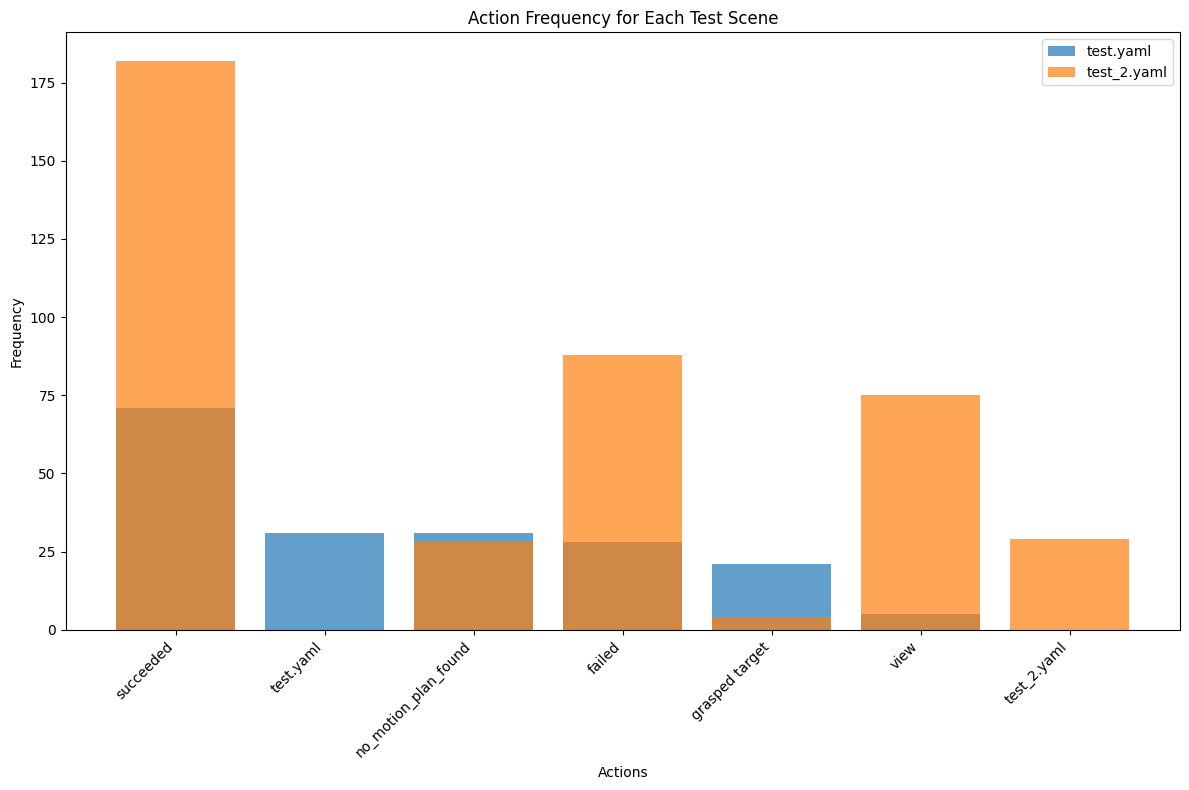

In [11]:
# Step 2: Group the data by test scenes
grouped = df.groupby('Scene')

# Step 3: Plot the data for each test scene
plt.figure(figsize=(12, 8))

for scene, scene_data in grouped:
    action_counts = scene_data['Action'].value_counts()
    scene_name = scene_data.iloc[0]['Scene']

    plt.bar(action_counts.index, action_counts.values, label=scene_name, alpha=0.7)

plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.title('Action Frequency for Each Test Scene')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:
# Step 1: Create a new DataFrame to summarize frequencies
summary_df = pd.DataFrame()

# Step 2: Identify consecutive blocks of YAMLs and aggregate the frequencies
consecutive_group = (df['Scene'] != df['Scene'].shift()).cumsum()
print(consecutive_group)
for block_id, group_df in df.groupby(['Scene', consecutive_group]):
    scene, block = block_id
    block_summary = group_df['Action'].value_counts()
    summary_df.loc[scene, block_summary.index] = block_summary.values

# Fill NaN values with 0
summary_df = summary_df.fillna(0).astype(int)

# Display the summary DataFrame
# print(summary_df)
summary_df.info

0       1
1       2
2       3
3       4
4       5
       ..
597    67
598    67
599    67
600    67
601    68
Name: Scene, Length: 602, dtype: int64


<bound method DataFrame.info of              succeeded  test.yaml  view  grasped target  failed  \
test.yaml            2          1     1               1       5   
test_2.yaml          7          0     1               1       1   

             no_motion_plan_found  test_2.yaml  
test.yaml                       3            0  
test_2.yaml                     5            1  >

In [7]:
import csv

# Initialize a dictionary to store actions for each test scene
test_scene_actions = {}

# Replace 'your_csv_file.csv' with the actual CSV file path
csv_file =  "/home/pitcher/dev_ws/thesis_ws/active_search/src/active_search/logs/policy_log_2.csv"

# Read the CSV file
with open(csv_file, mode='r', newline='') as file:
    csv_reader = csv.reader(file)
    current_test_scene = None
    actions = []

    test_count = 0;

    for row in csv_reader:
        # Assuming that the test scenes are identified by the 'test' prefix in their names
        if row[0].startswith('test'):

            if current_test_scene:
                test_scene_actions[current_test_scene] = actions
            current_test_scene = row[0]+"_inst_"+str(test_count)
            test_count += 1
            actions = []
        else:
            # Assuming that each row contains a single action value
            actions.append(row[0])

    # Add the actions for the last test scene
    if current_test_scene:
        test_scene_actions[current_test_scene] = actions

# Print the results
for test_scene, actions in test_scene_actions.items():
    print(f'Test Scene: {test_scene}, Actions: {actions}')

Test Scene: test.yaml_inst_0, Actions: ['succeeded', 'succeeded', 'succeeded', 'failed', 'failed', 'failed', 'failed', 'failed']
Test Scene: test.yaml_inst_1, Actions: ['view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'succeeded', 'view', 'succeeded', 'grasped target']
Test Scene: test_2.yaml_inst_2, Actions: []
Test Scene: test.yaml_inst_3, Actions: ['view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view']
Test Scene: test_2.yaml_inst_4, Actions: ['succeeded', 'view', 'succeeded', 'view', 'failed', 'no_motion_plan_found', 'no_motion_plan_found', 'no_motion_plan_found', 'no_motion_plan_found']
Test Scene: test.yaml_inst_5, Actions: ['view', 'view', 'view', 'view', '

In [25]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter


# Initialize a dictionary to store actions for each test scene
test_scene_actions = defaultdict(list)

# Replace 'your_csv_file.csv' with the actual CSV file path
csv_file =  "/home/pitcher/dev_ws/thesis_ws/active_search/src/active_search/logs/policy_log_3.csv"

# Read the CSV file
with open(csv_file, mode='r', newline='') as file:
    csv_reader = csv.reader(file)
    current_test_scene = None
    actions = []

    test_count = 0

    for row in csv_reader:
        # Assuming that the test scenes are identified by the 'test' prefix in their names
        if row[0].startswith('test'):
            if current_test_scene:
                test_scene_actions[current_test_scene] = actions
            current_test_scene = f'{row[0]}_inst_{test_count}'
            test_count += 1
            actions = []
        else:
            # Assuming that each row contains a single action value
            actions.append(row[0])

    # Add the actions for the last test scene
    if current_test_scene:
        test_scene_actions[current_test_scene] = actions

print(test_scene_actions)

defaultdict(<class 'list'>, {'test.yaml_inst_0': ['view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'succeeded', 'view', 'succeeded', 'grasped target'], 'test_2.yaml_inst_1': ['view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view'], 'test_3.yaml_inst_2': ['view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view'], 'test_4.yaml_inst_3': ['succeeded', 'grasped target'], 'test.yaml_inst_4': ['view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'succeeded', 'view', 'succeeded', 'grasped target'], 'test_2.yaml_inst_5': ['view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', 'view', '

In [26]:
pos_actions  = ['grasped target', 'failed', 'view', 'succeeded', 'no_motion_plan_found']

# Create a dictionary to store the counts of each action
scene_1_action_counts = defaultdict(list)
scene_2_action_counts = defaultdict(list)
scene_3_action_counts = defaultdict(list)
scene_4_action_counts = defaultdict(list)

# Count the frequency of each action for each instance
for test_scene, actions in test_scene_actions.items():
    if test_scene.startswith("test_2"):
        action_freq = Counter(actions)
        # print(action_freq.get('grasped target'))
        for action in pos_actions:
            if action_freq.get(action) is None:
                scene_2_action_counts[action].append(0)
            else:
                scene_2_action_counts[action].append(action_freq[action])

    elif test_scene.startswith("test.yaml"):
        action_freq = Counter(actions)
        for action in pos_actions:
            if action_freq.get(action) is None:
                scene_1_action_counts[action].append(0)
            else:
                scene_1_action_counts[action].append(action_freq[action])

    elif test_scene.startswith("test_3"):
        action_freq = Counter(actions)
        for action in pos_actions:
            if action_freq.get(action) is None:
                scene_3_action_counts[action].append(0)
            else:
                scene_3_action_counts[action].append(action_freq[action])

    elif test_scene.startswith("test_4"):
        action_freq = Counter(actions)
        for action in pos_actions:
            if action_freq.get(action) is None:
                scene_4_action_counts[action].append(0)
            else:
                scene_4_action_counts[action].append(action_freq[action])



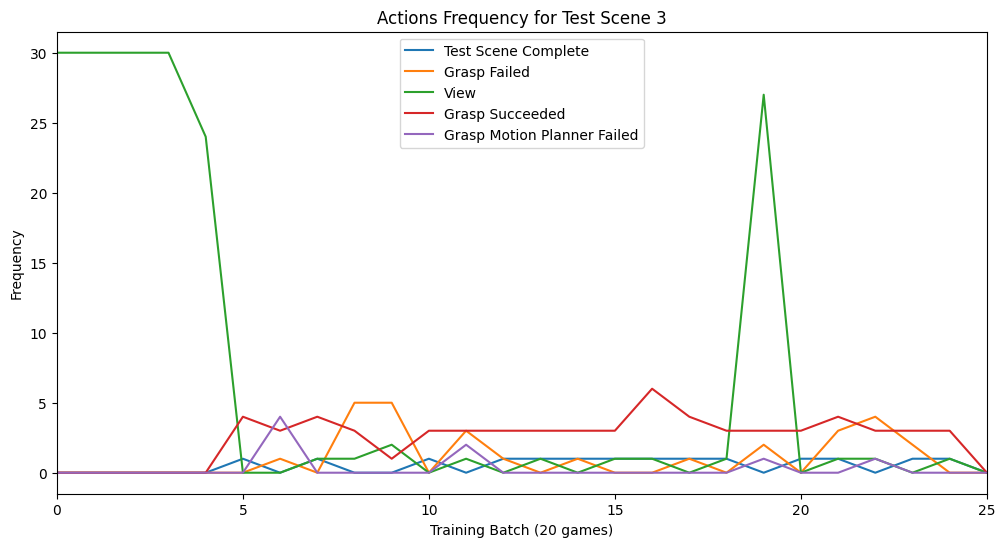

In [30]:
# Create a plot with instances on the x-axis and lines for each action
instances = list(range(test_count))
plt.figure(figsize=(12, 6))

# Plot each action
for action, freq_list in scene_3_action_counts.items():
    # Fill in with zeros for instances where the action is missing
    while len(freq_list) < test_count:
        freq_list.append(0)
    plt.plot(instances, freq_list, label=action)

plt.xlabel('Training Batch (20 games)')
plt.ylabel('Frequency')
plt.xlim(0,25)
plt.title('Actions Frequency for Test Scene 3')
# plt.xlim(0,test_count/2)
plt.legend(['Test Scene Complete', 'Grasp Failed', 'View', 'Grasp Succeeded', 'Grasp Motion Planner Failed'])
# plt.legend()
plt.show()

dict_items([('grasped target', [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('failed', [0, 0, 0, 0, 0, 1, 2, 3, 5, 4, 5, 2, 4, 2, 1, 4, 5, 5, 5, 3, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('view', [10, 10, 7, 13, 7, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('succeeded', [2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2

/tmp/ipykernel_5791/280230409.py:11: RuntimeWarning: invalid value encountered in divide
  percent_failed = np.nan_to_num(failed_grasps/(succeeded_grasps + failed_grasps + no_motion_grasps))
/tmp/ipykernel_5791/280230409.py:12: RuntimeWarning: invalid value encountered in divide
  percent_no_motion = np.nan_to_num(no_motion_grasps/(succeeded_grasps + failed_grasps + no_motion_grasps))


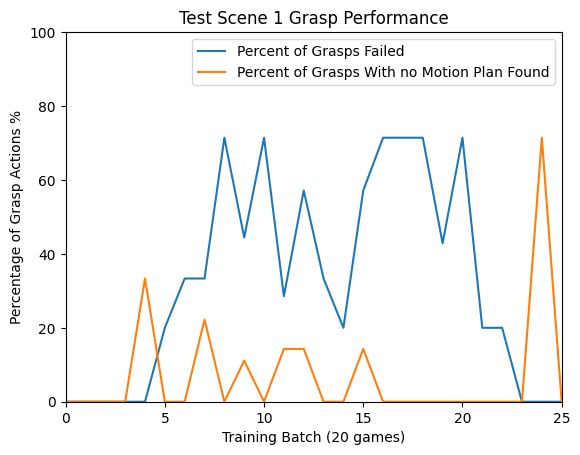

In [57]:
import numpy as np

print(scene_1_action_counts.items())
print(len(scene_1_action_counts['failed']))
print(len(scene_1_action_counts['succeeded']))

succeeded_grasps = np.asarray(scene_1_action_counts['succeeded'])
failed_grasps = np.asarray(scene_1_action_counts['failed'])
no_motion_grasps = np.asarray(scene_1_action_counts['no_motion_plan_found'])

total_views = np.asarray(scene_1_action_counts['view'])

percent_failed = np.nan_to_num(failed_grasps/(succeeded_grasps + failed_grasps + no_motion_grasps))
percent_no_motion = np.nan_to_num(no_motion_grasps/(succeeded_grasps + failed_grasps + no_motion_grasps))



# print(percent_failed)
# print(percent_failed)
# print(percent_no_motion)

plt.plot(percent_failed*100)
plt.plot(percent_no_motion*100)

plt.xlim(0,25)
plt.ylim(0,100)

plt.legend(["Percent of Grasps Failed","Percent of Grasps With no Motion Plan Found"])

plt.title("Test Scene 1 Grasp Performance")

plt.xlabel("Training Batch (20 games)")

plt.ylabel("Percentage of Grasp Actions %")

plt.show()

/tmp/ipykernel_5791/1116375695.py:3: RuntimeWarning: invalid value encountered in divide
  percent_views = total_views/(succeeded_grasps + failed_grasps + no_motion_grasps + total_views)


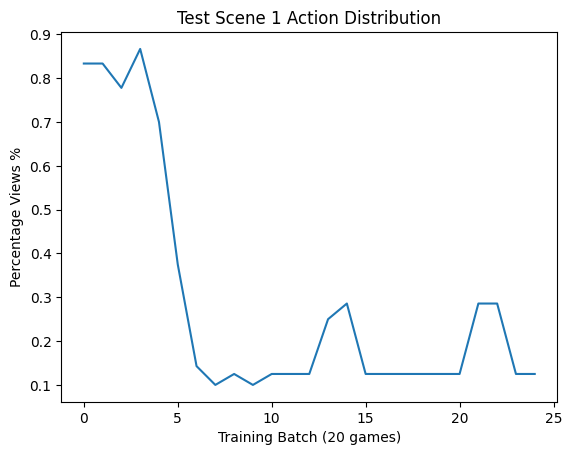

In [59]:

total_views = np.asarray(scene_1_action_counts['view'])

percent_views = total_views/(succeeded_grasps + failed_grasps + no_motion_grasps + total_views) 

plt.plot(percent_views)

plt.title("Test Scene 1 Action Distribution")

plt.xlabel("Training Batch (20 games)")

plt.ylabel("Percentage of Actions That are Views %")

plt.show()

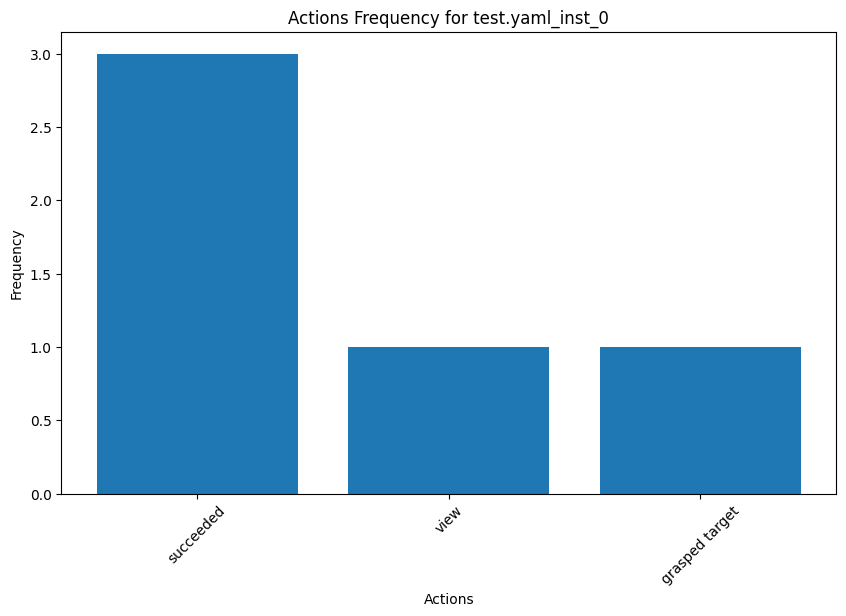

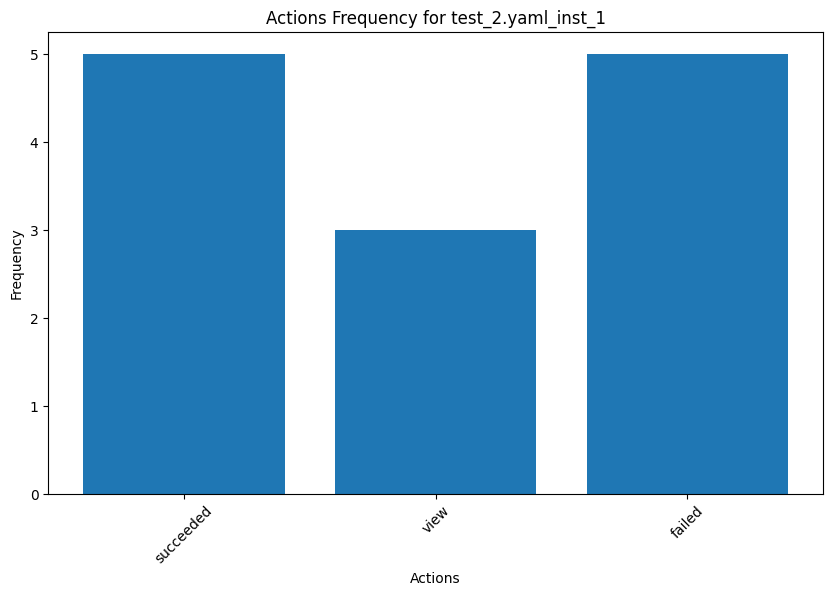

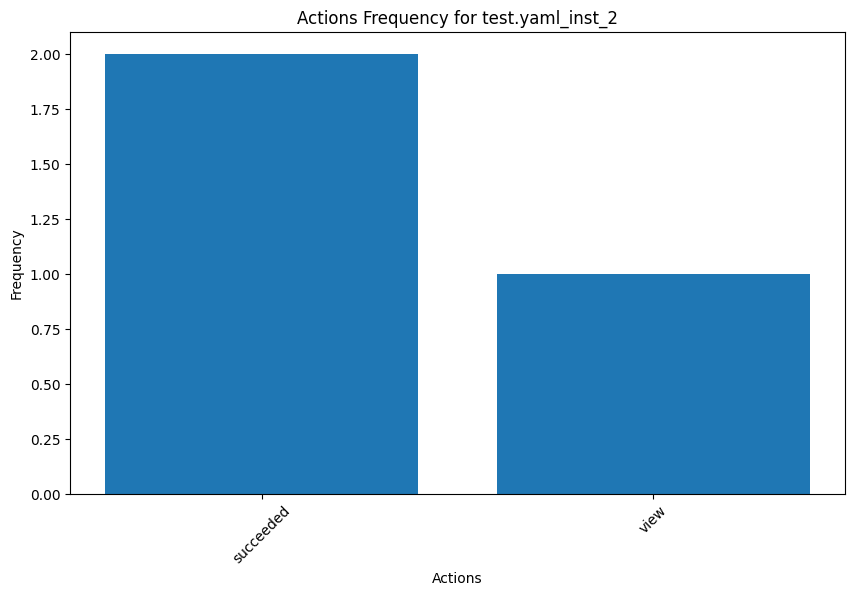

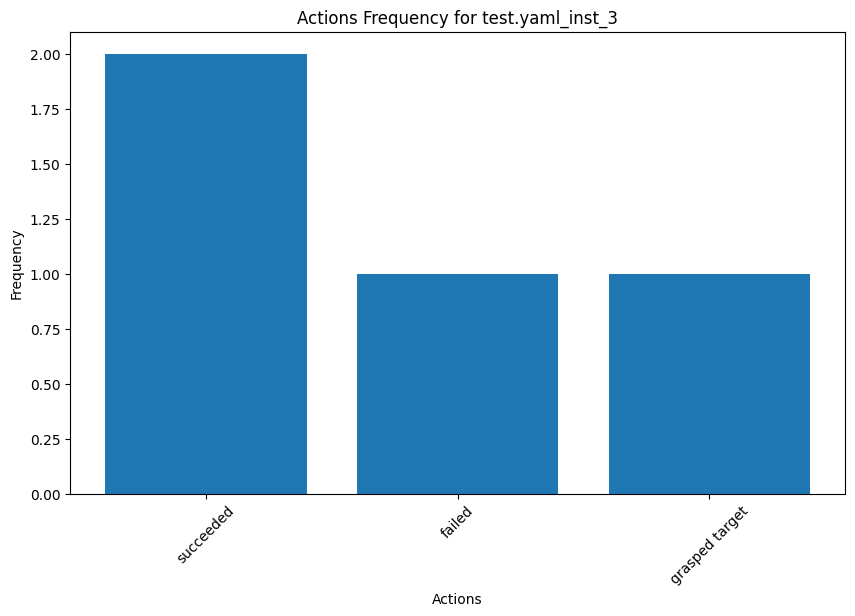

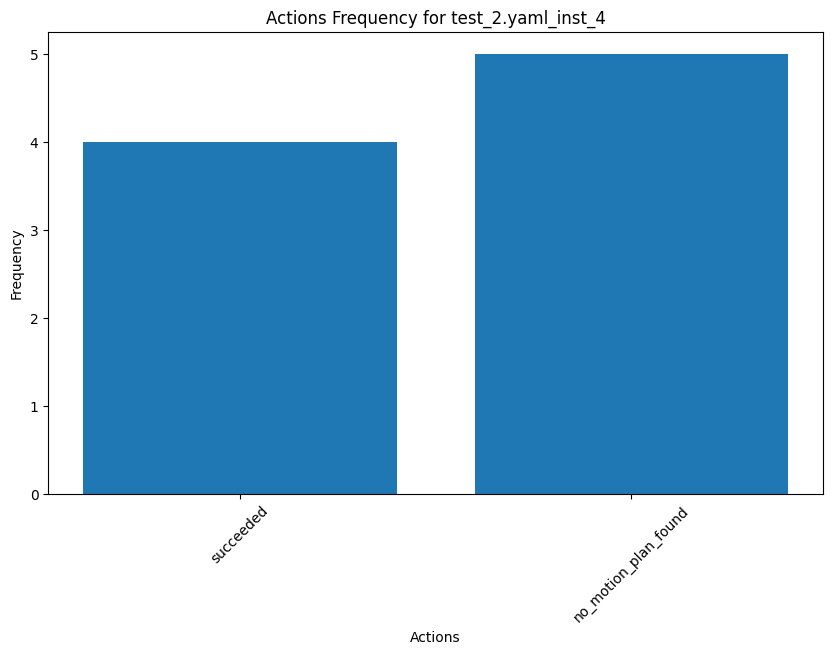

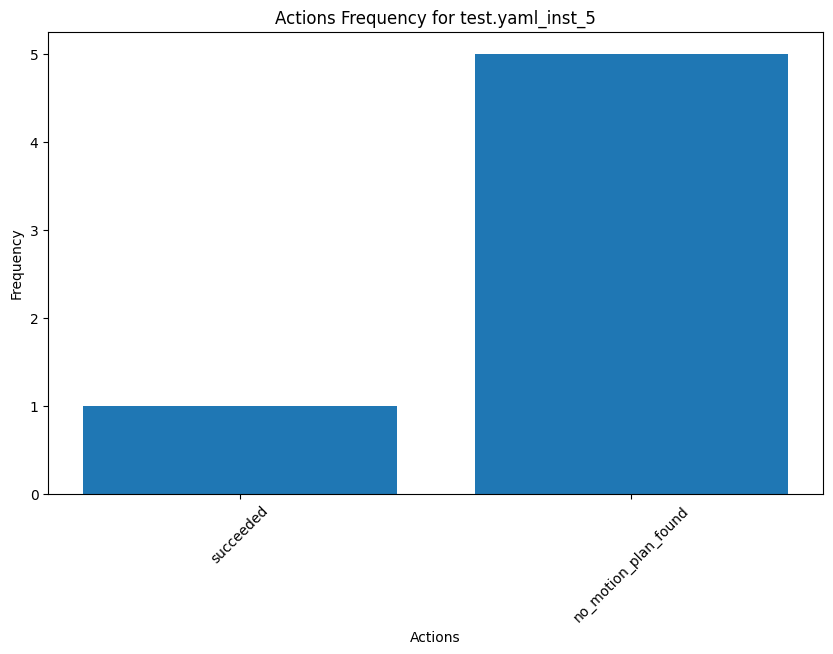

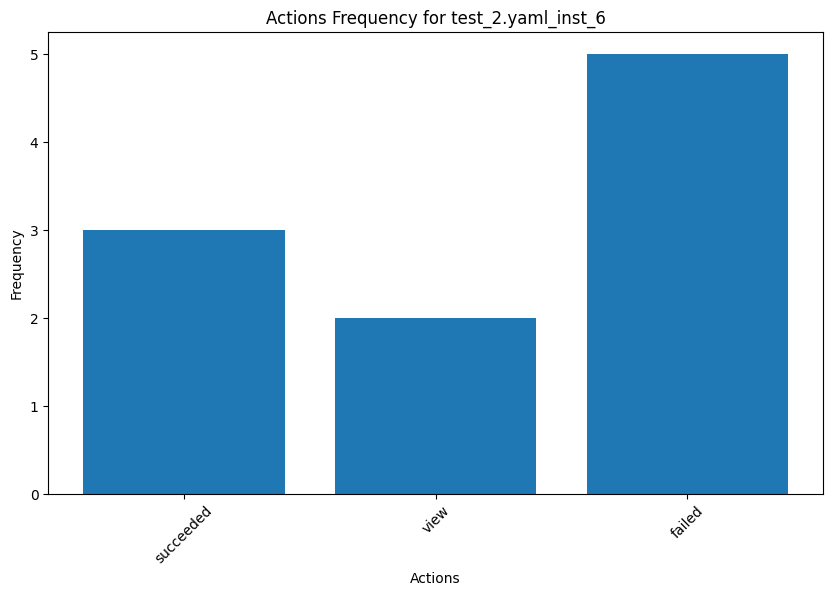

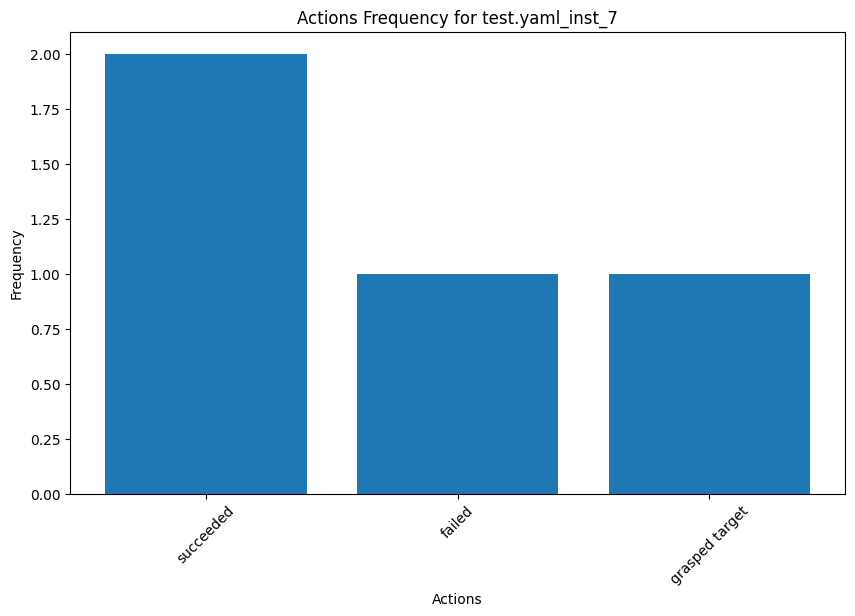

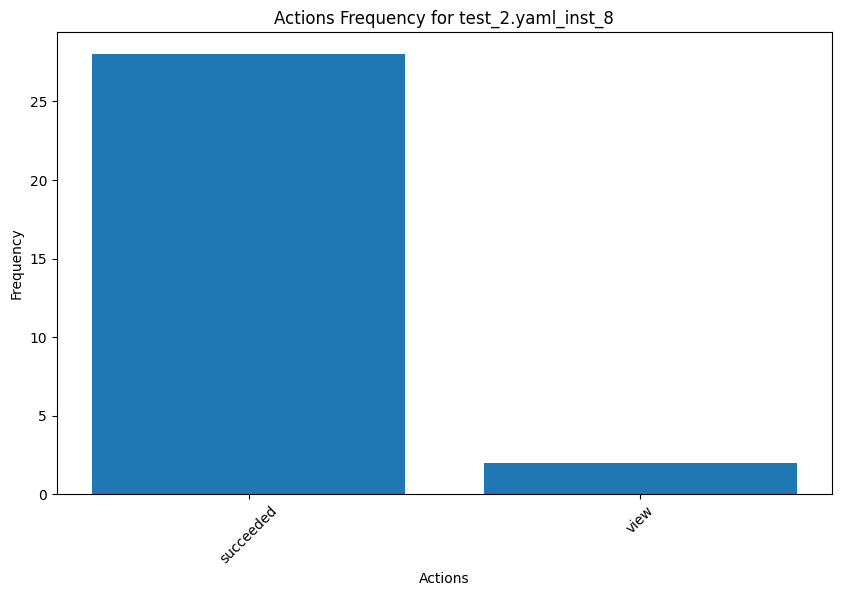

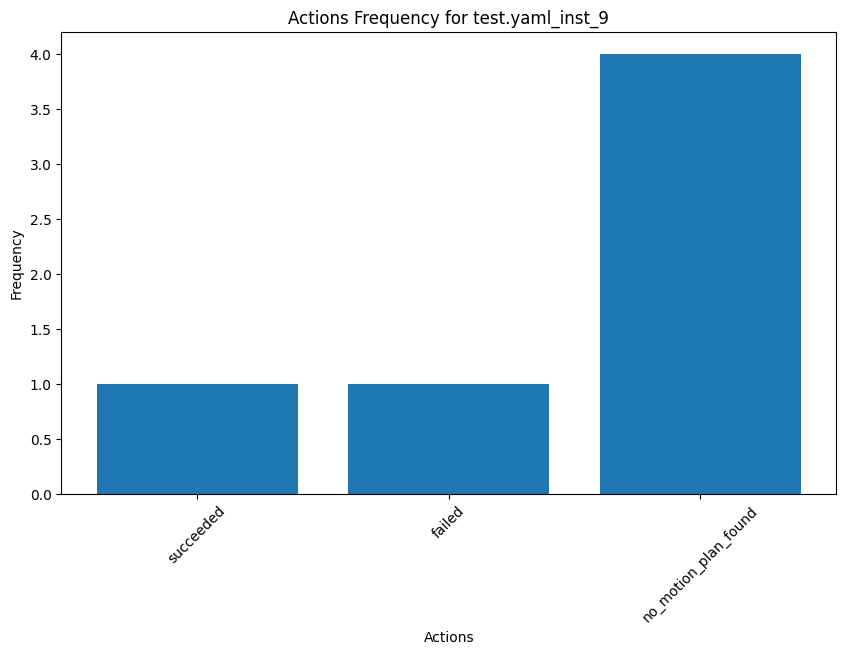

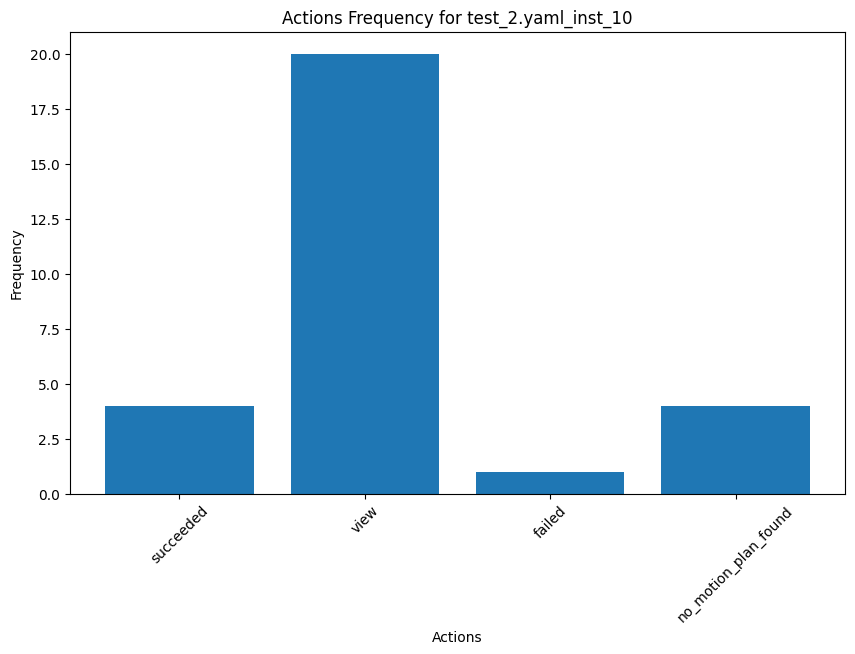

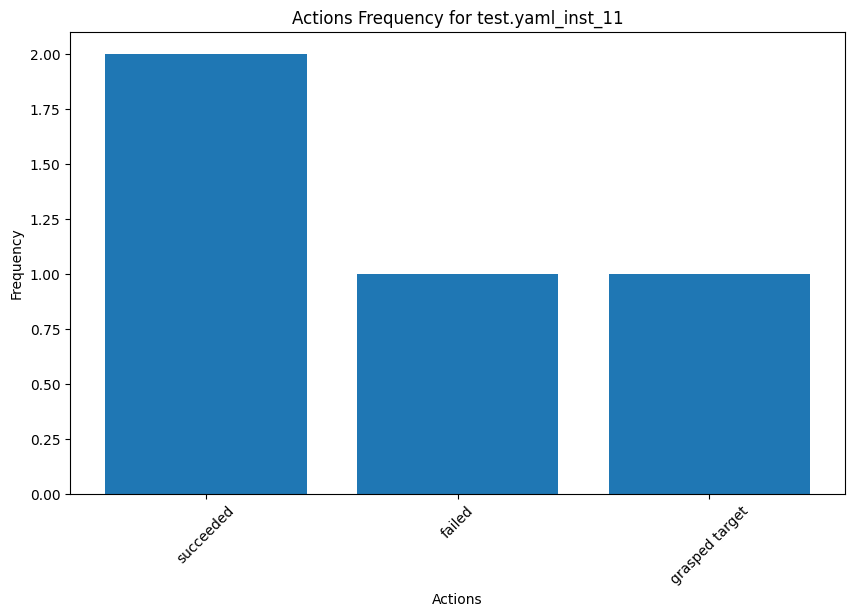

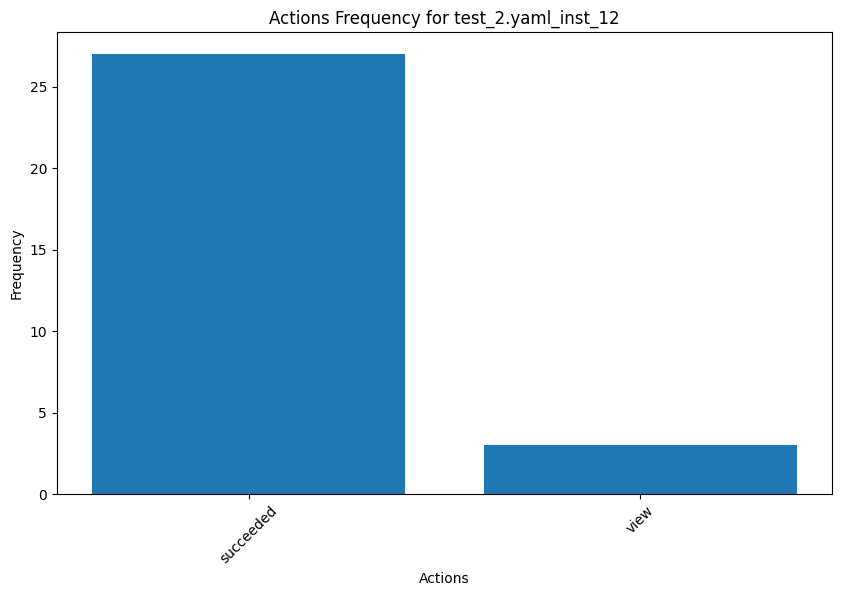

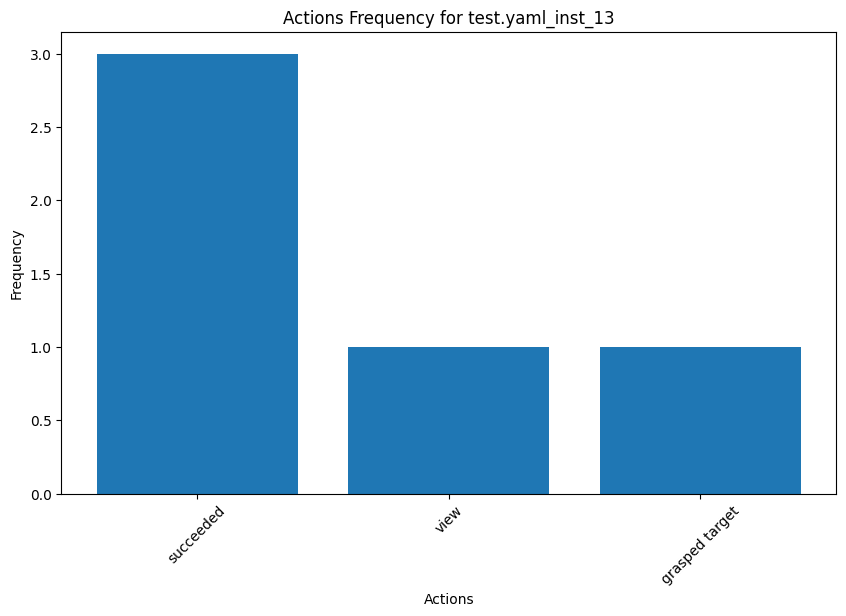

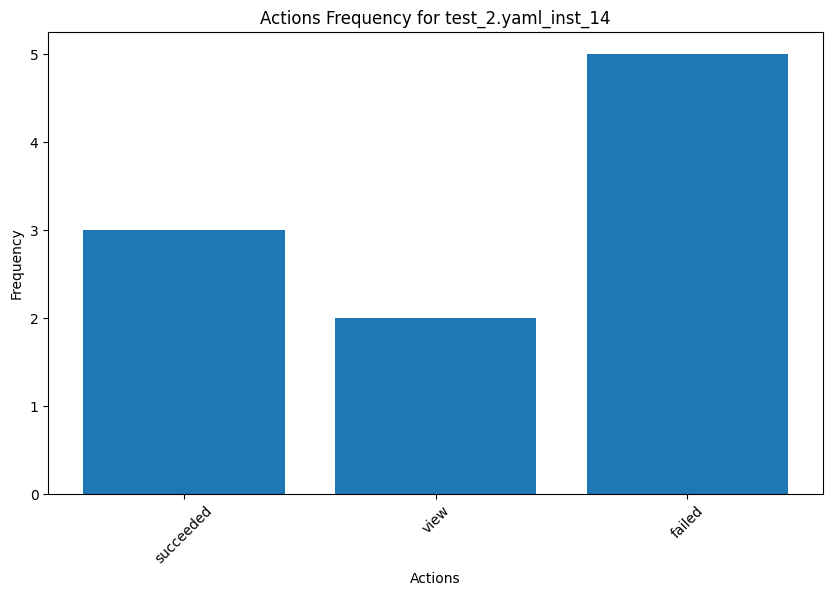

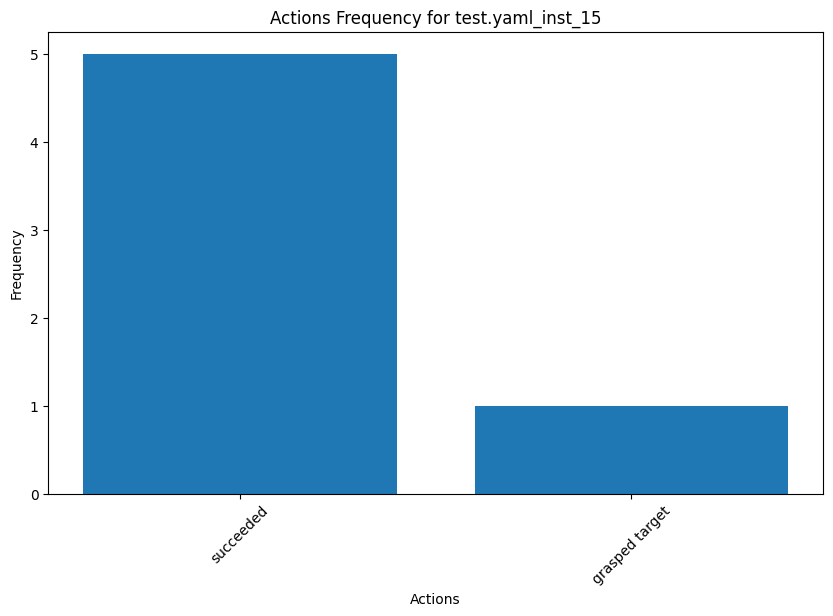

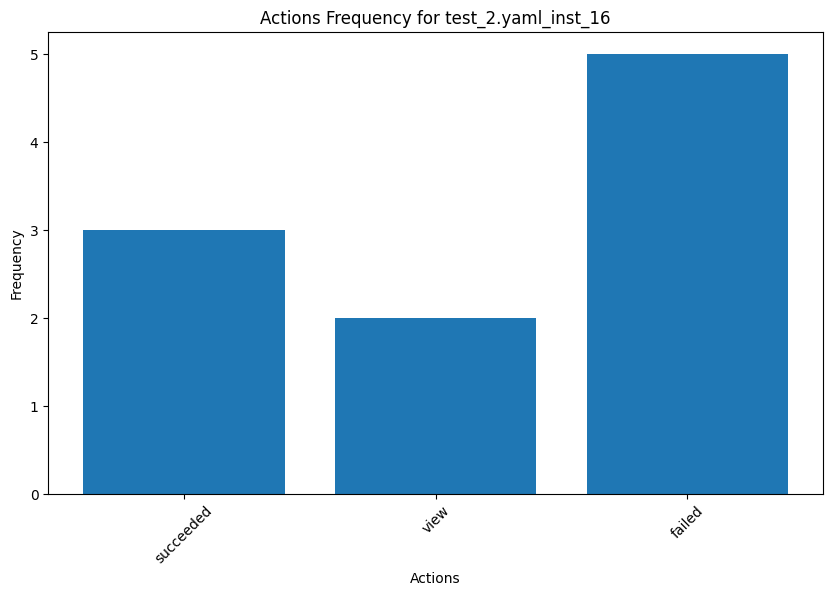

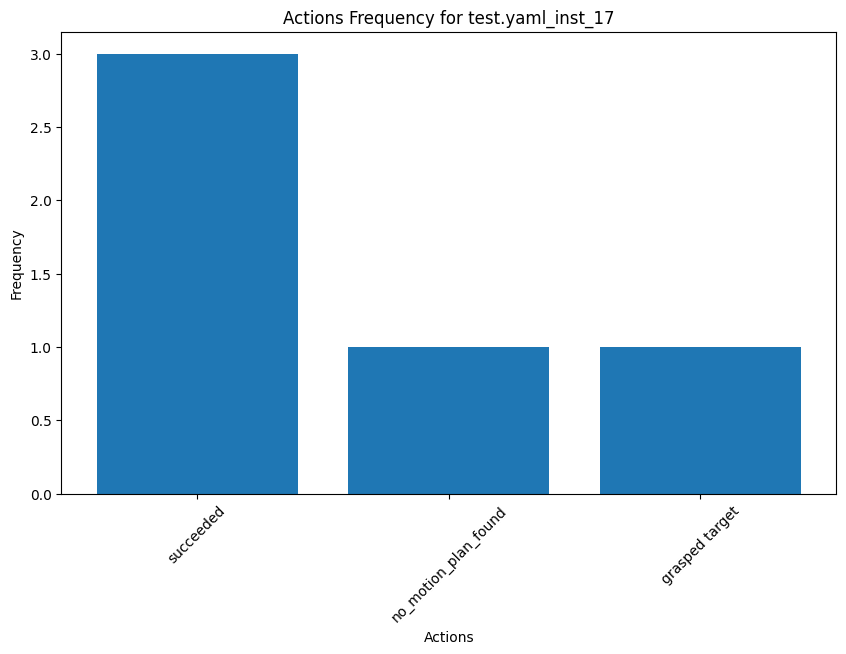

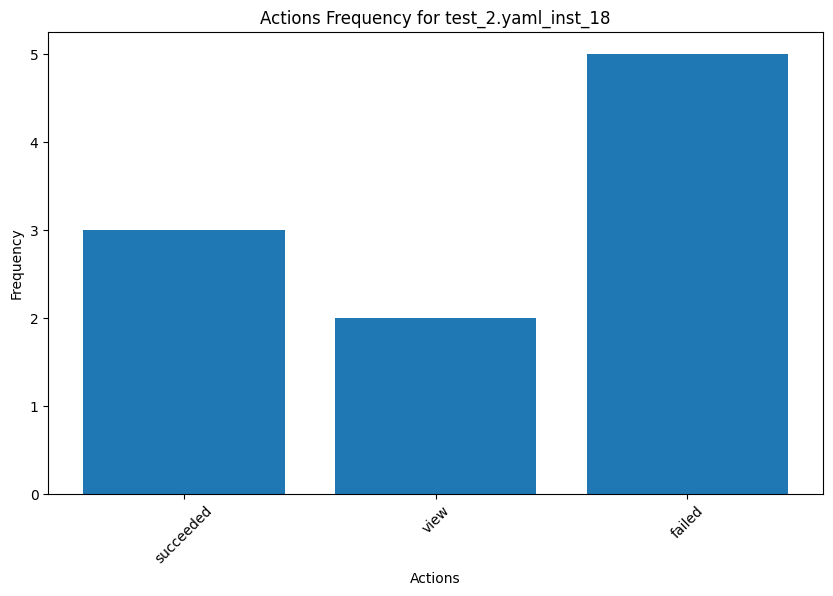

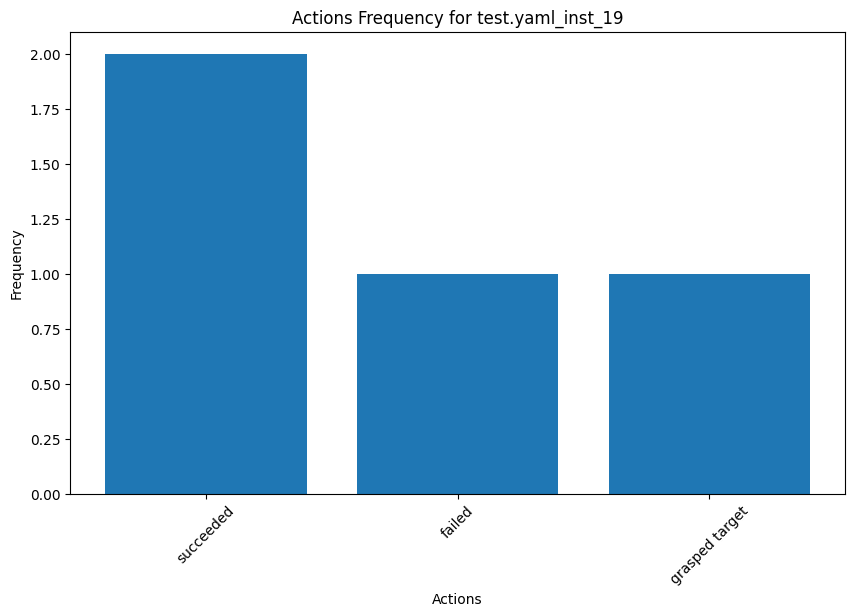

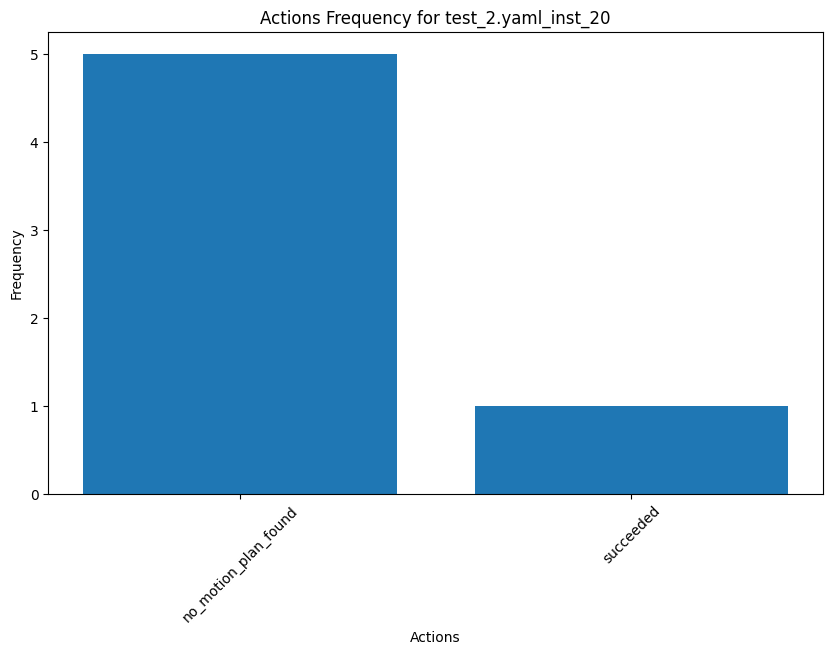

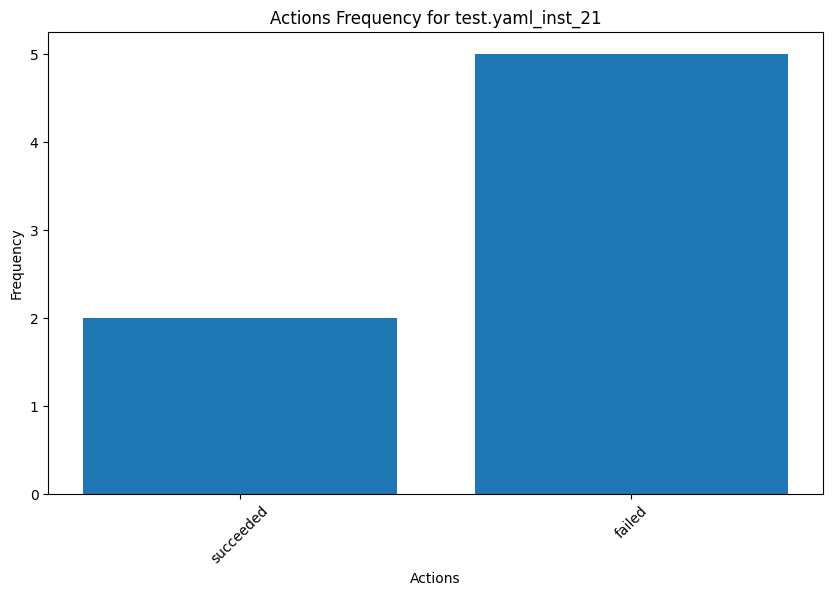

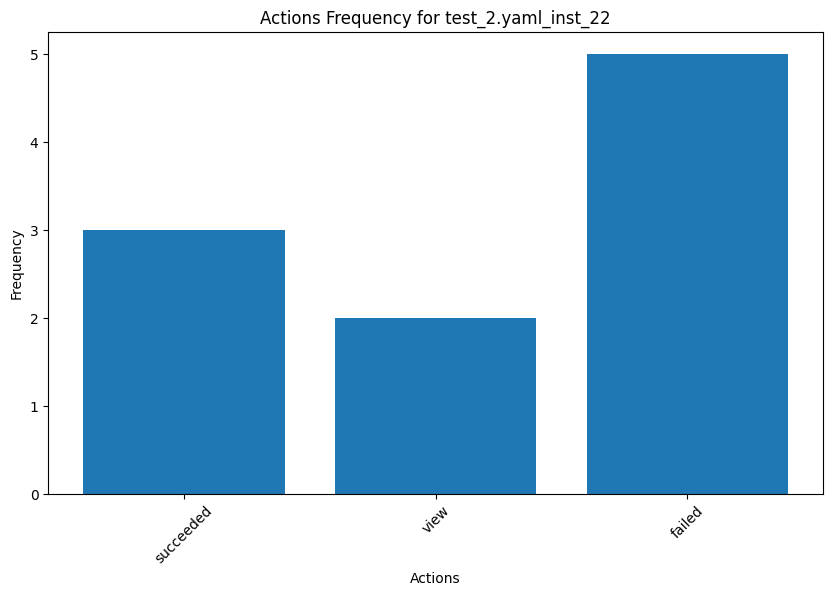

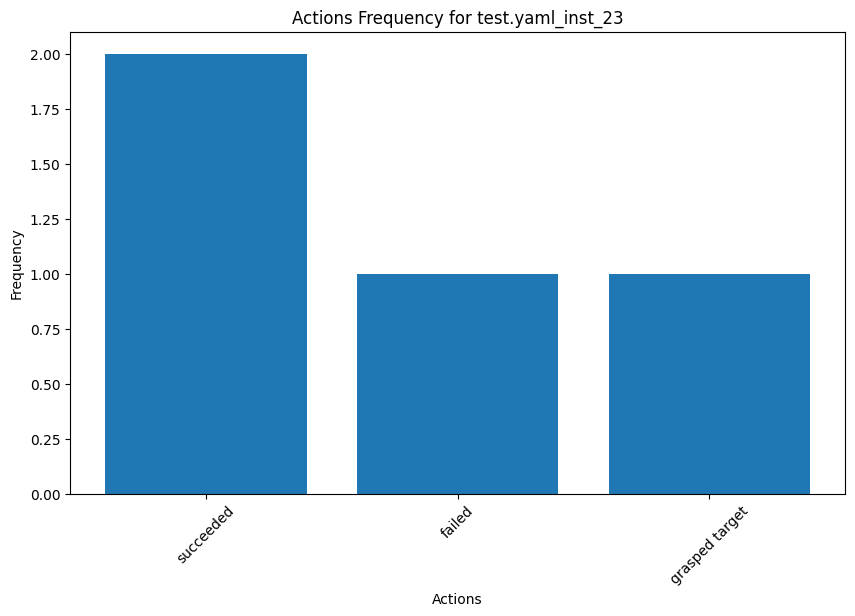

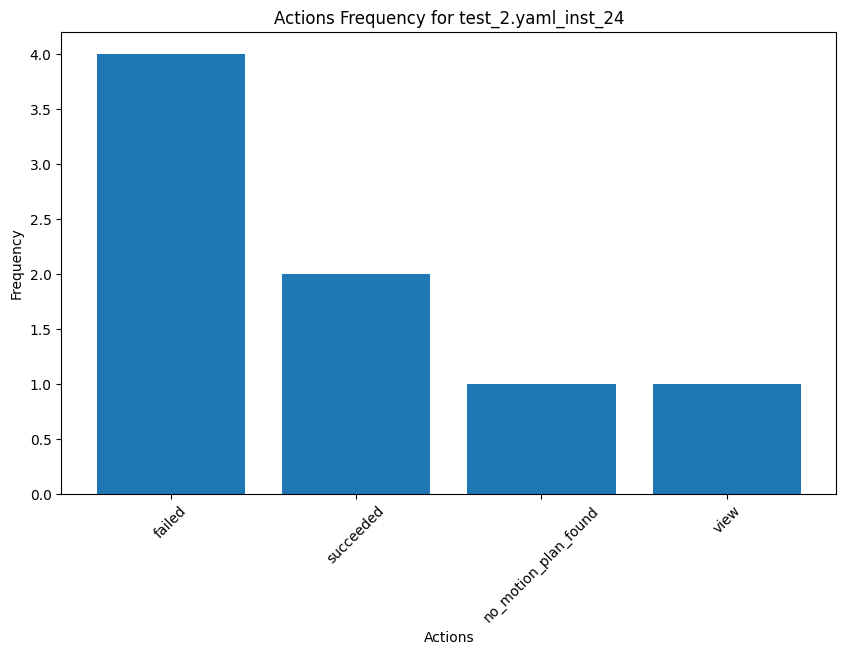

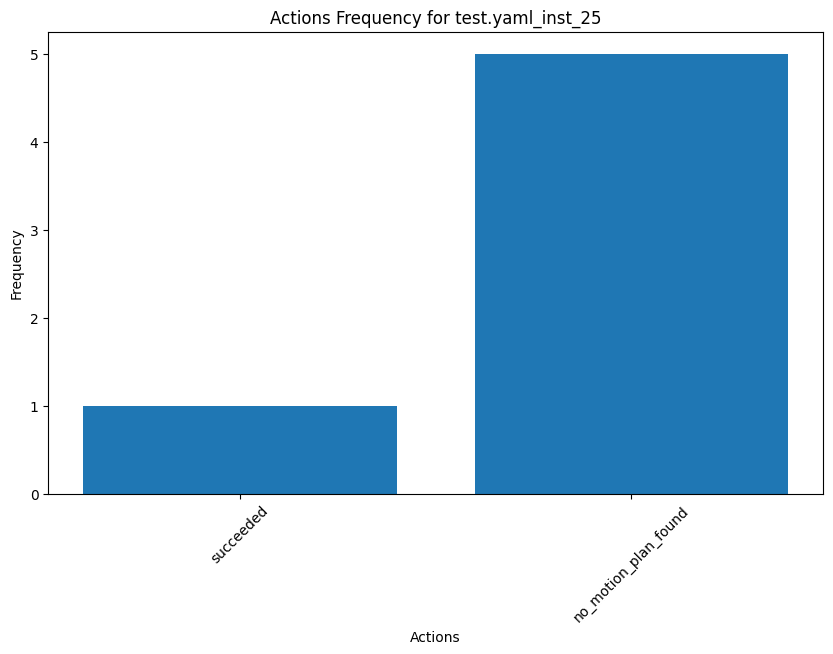

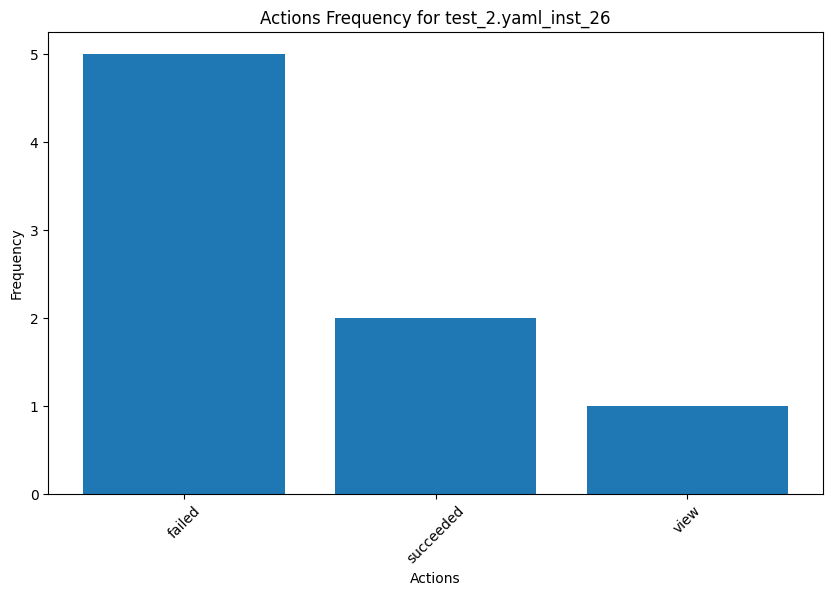

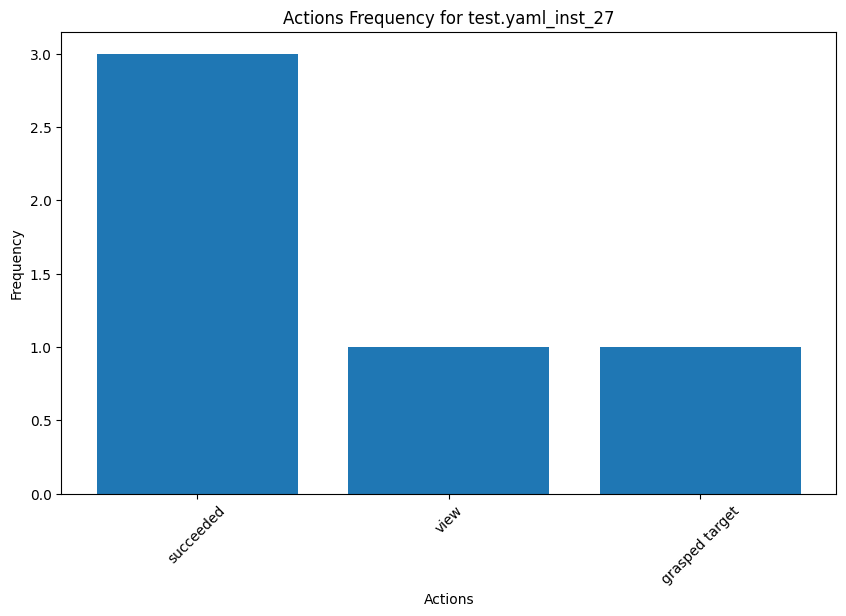

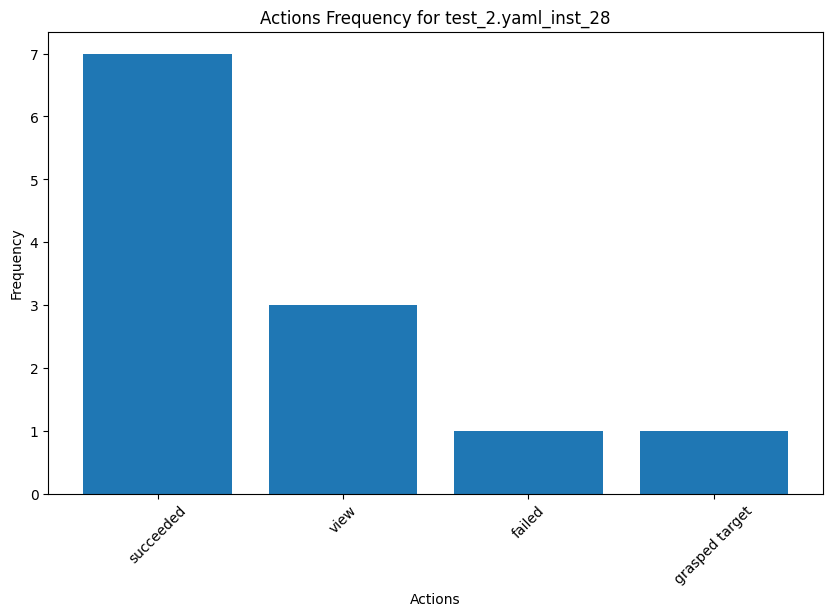

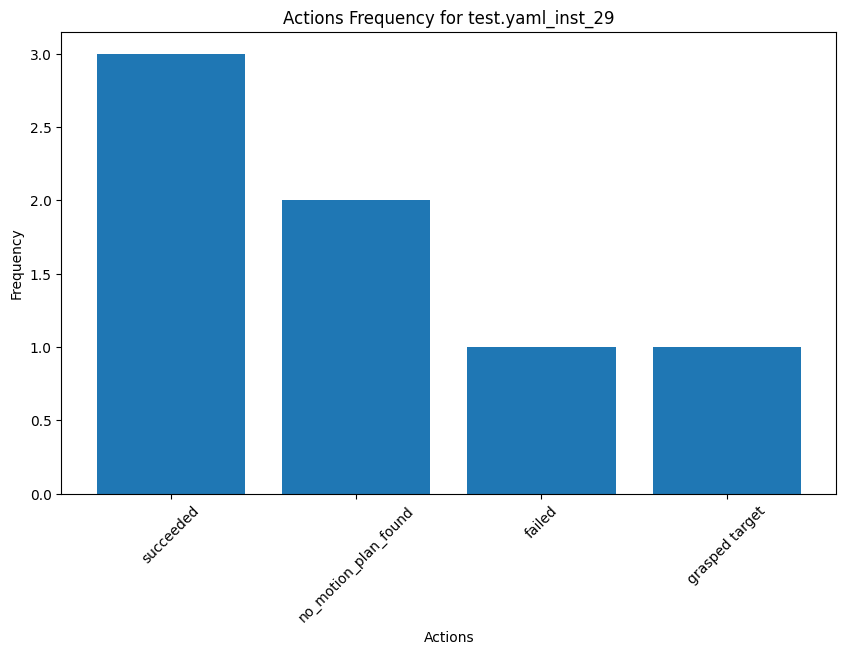

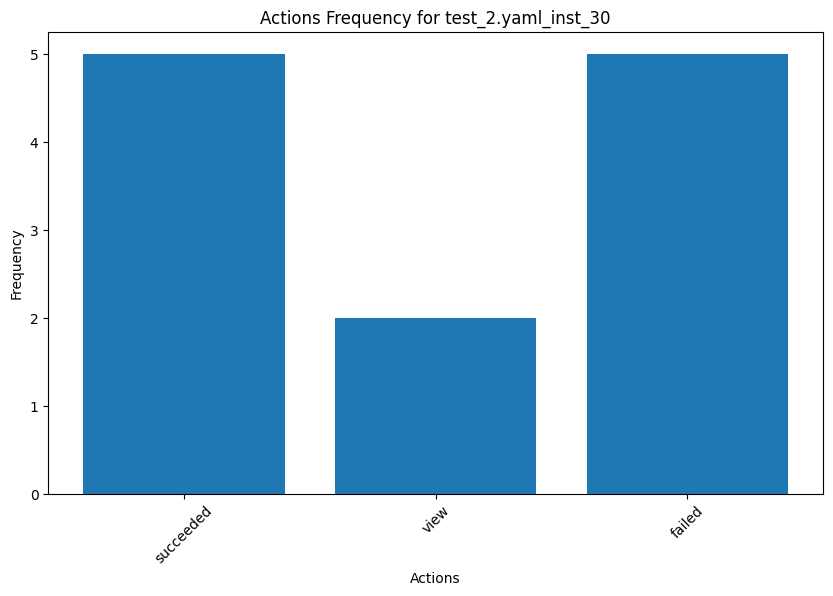

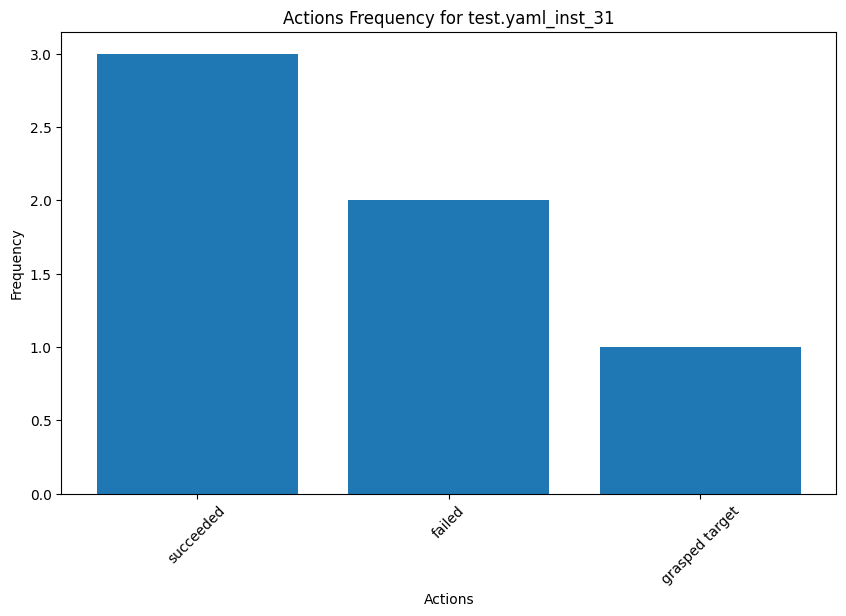

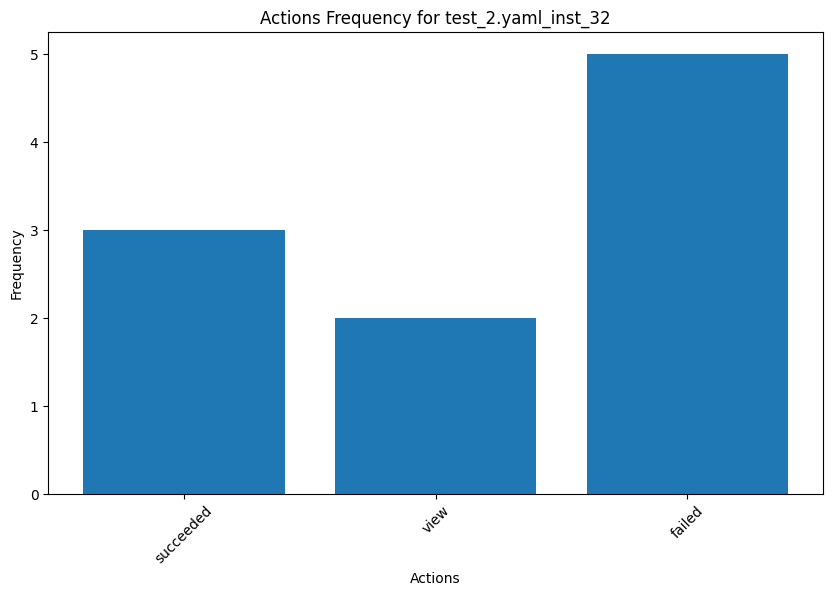

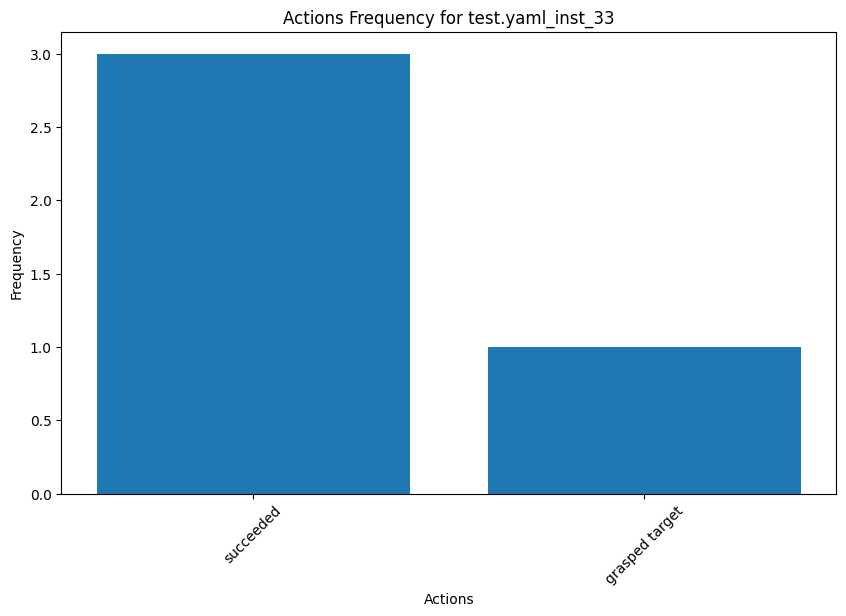

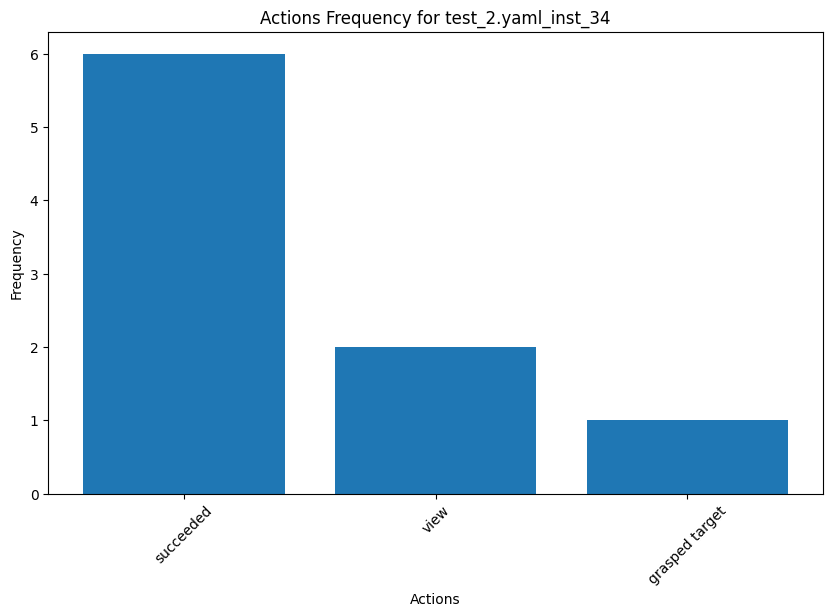

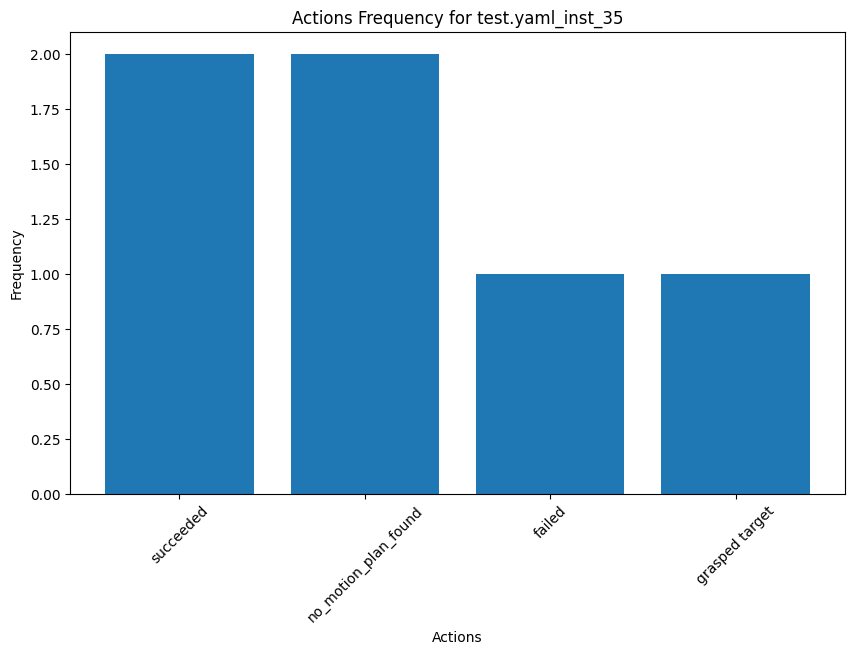

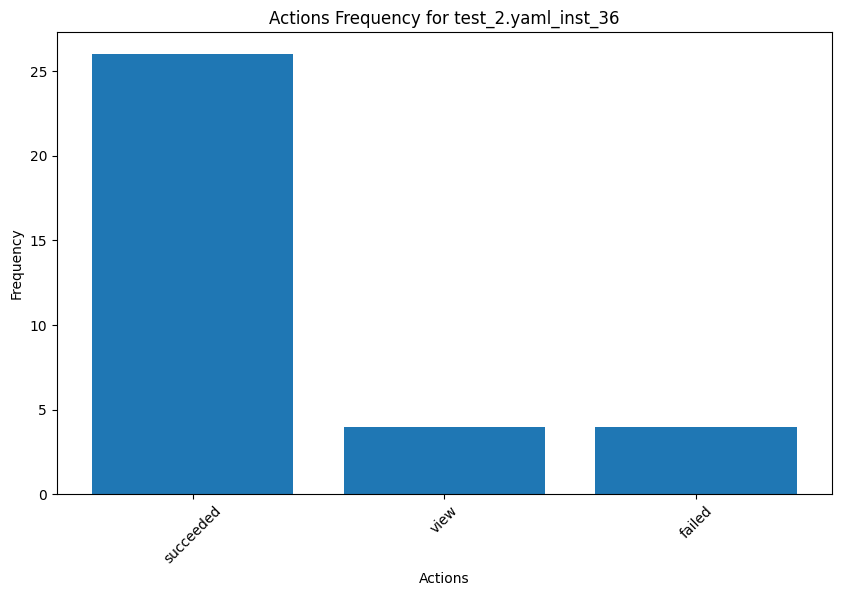

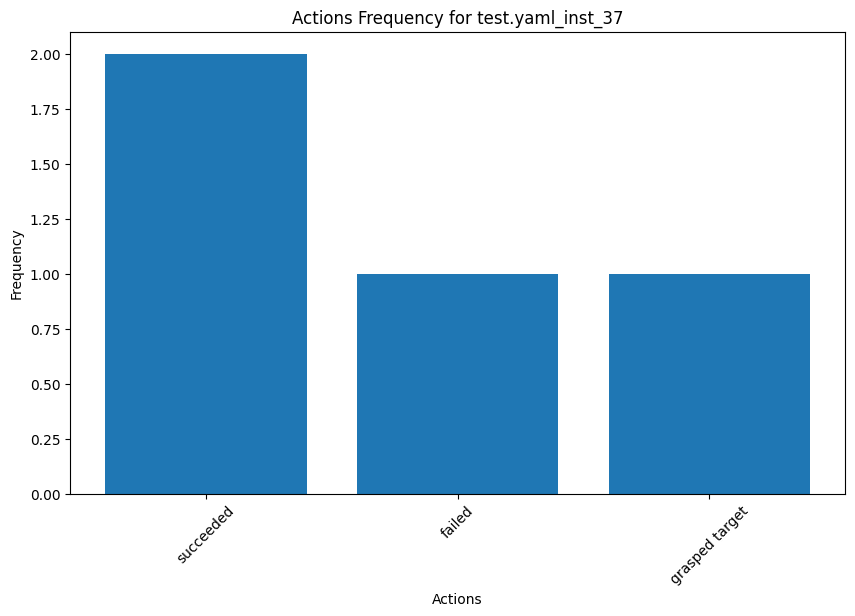

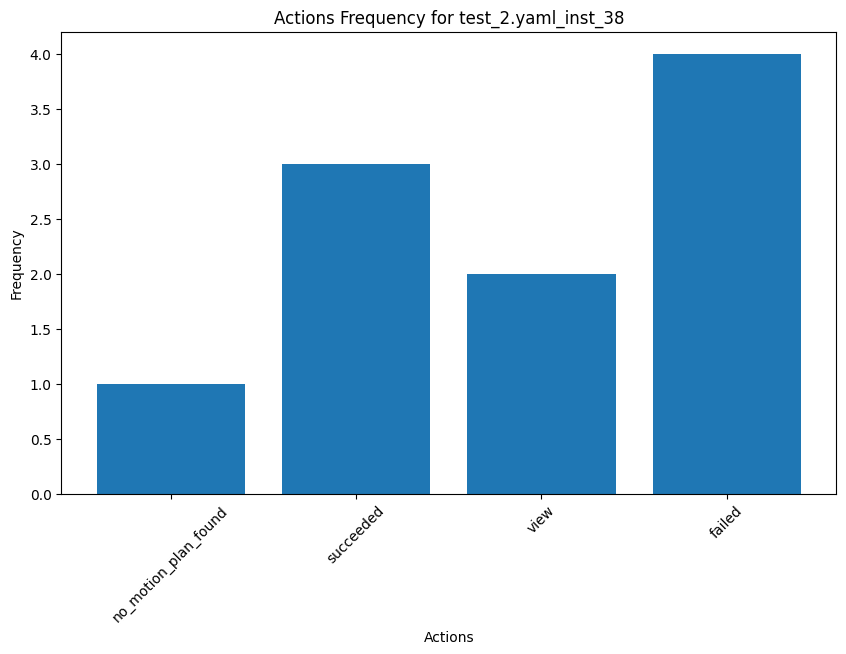

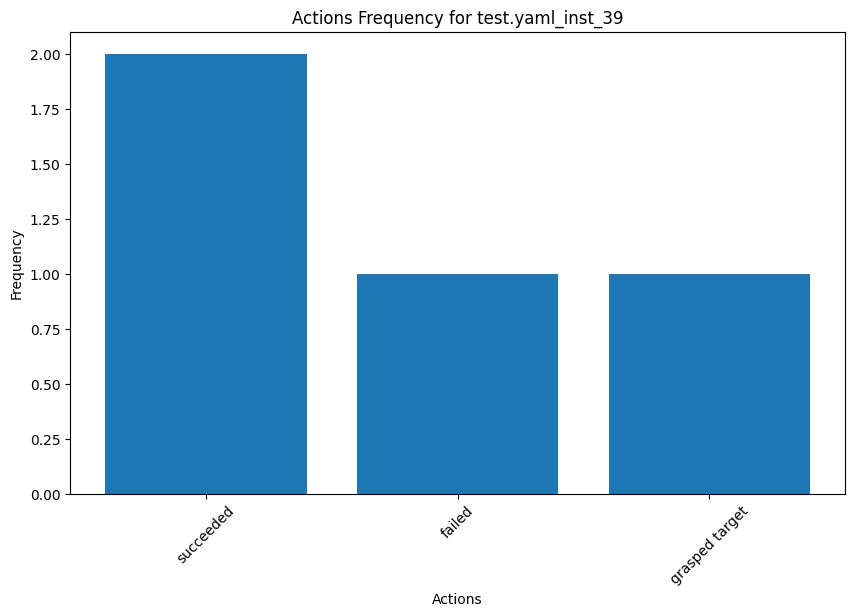

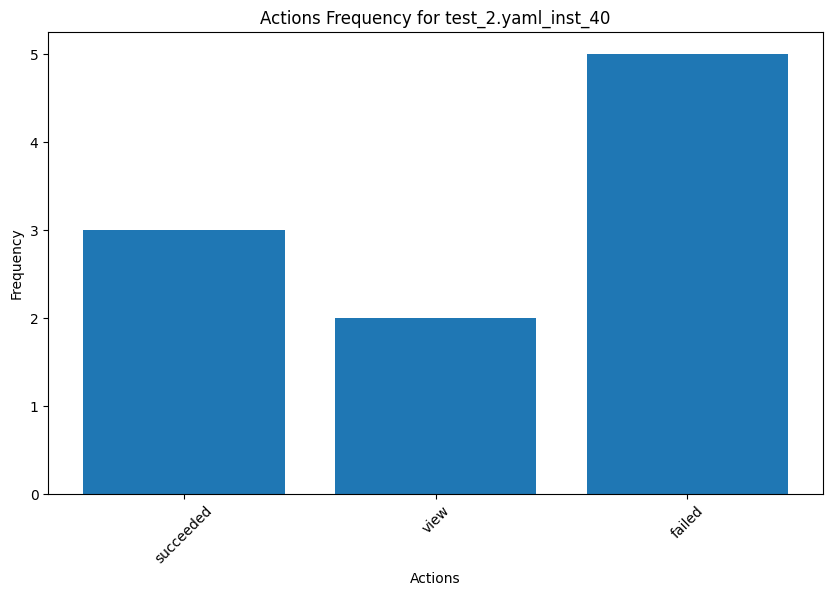

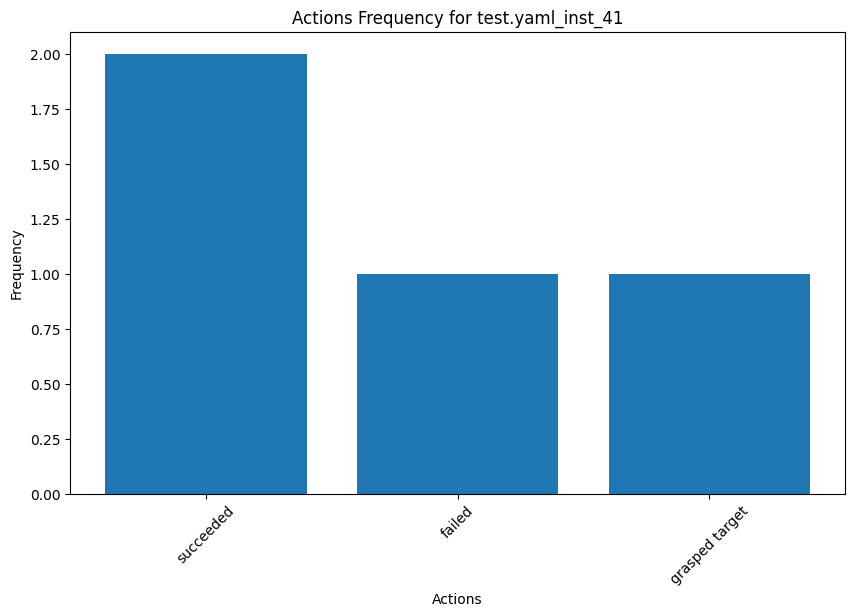

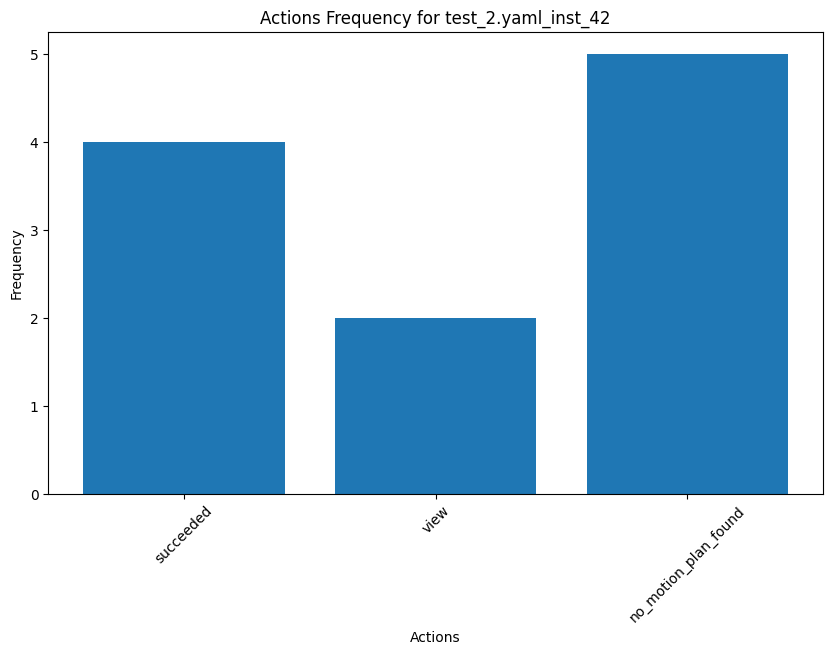

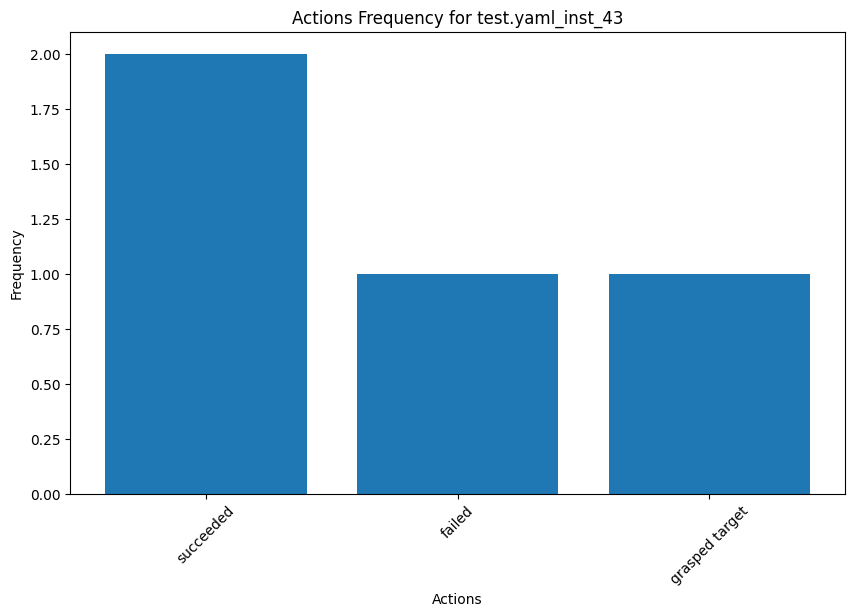

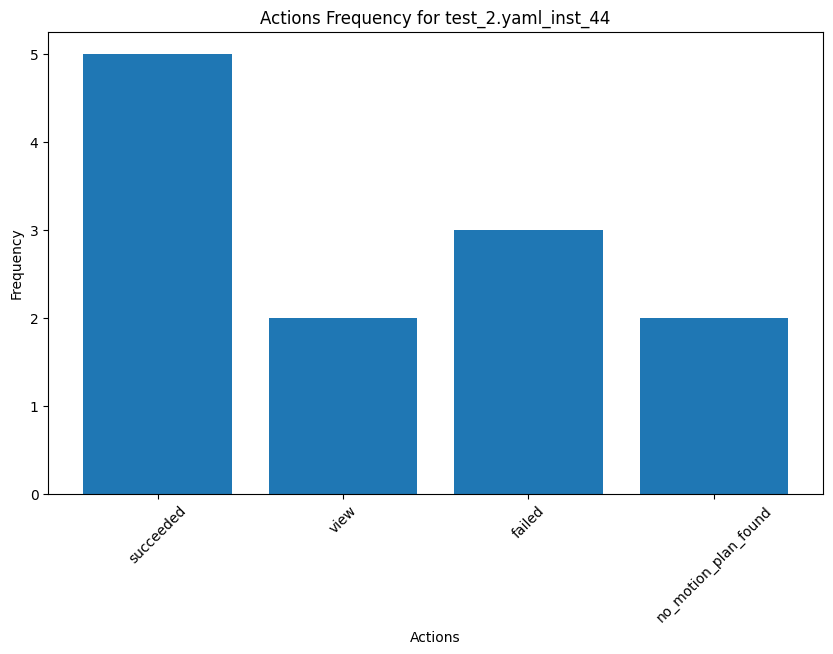

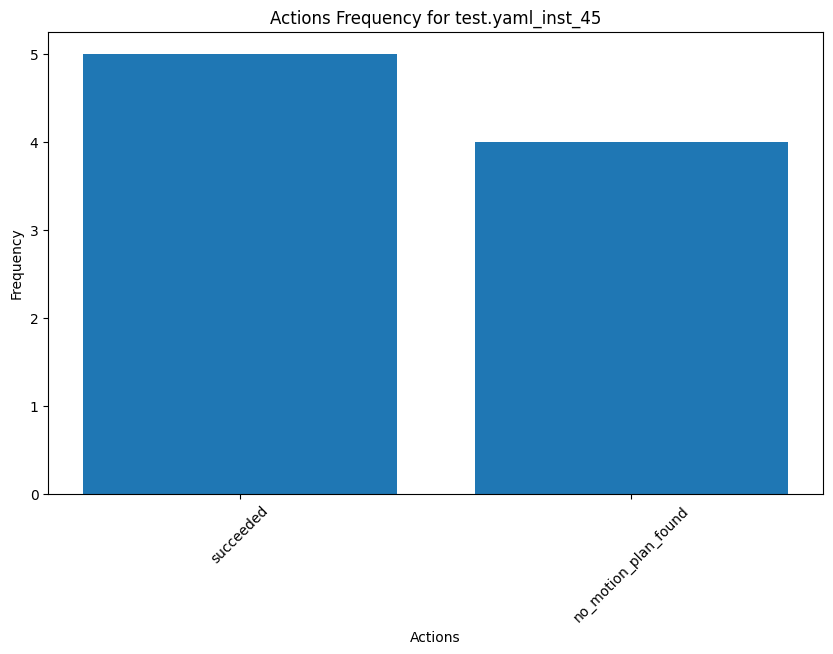

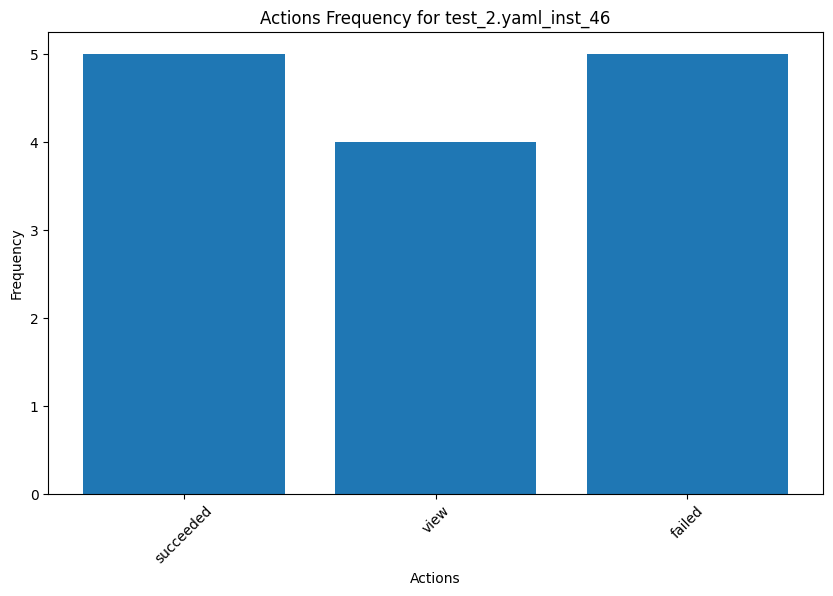

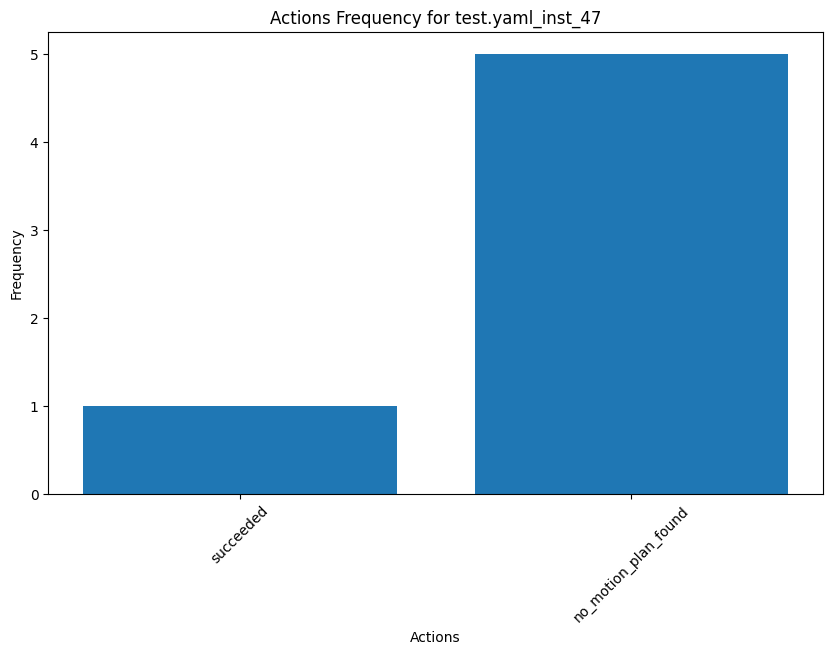

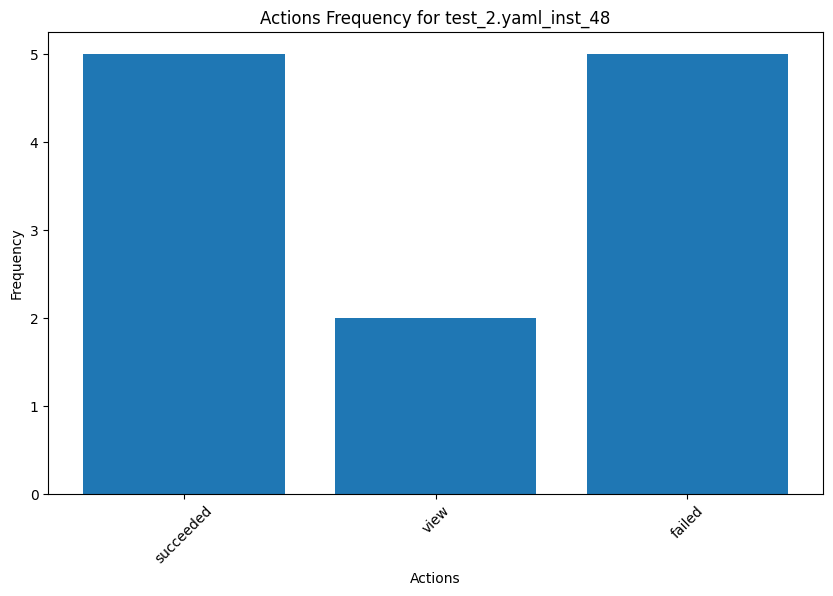

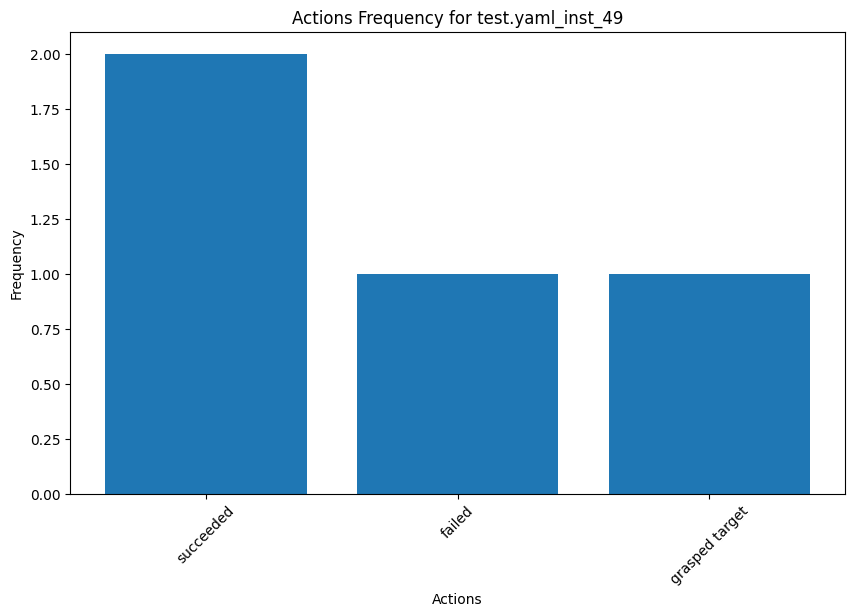

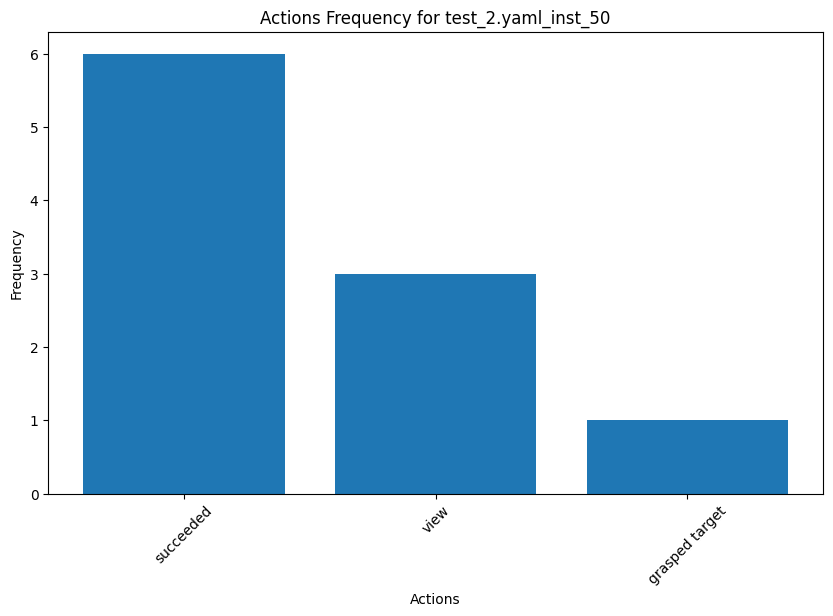

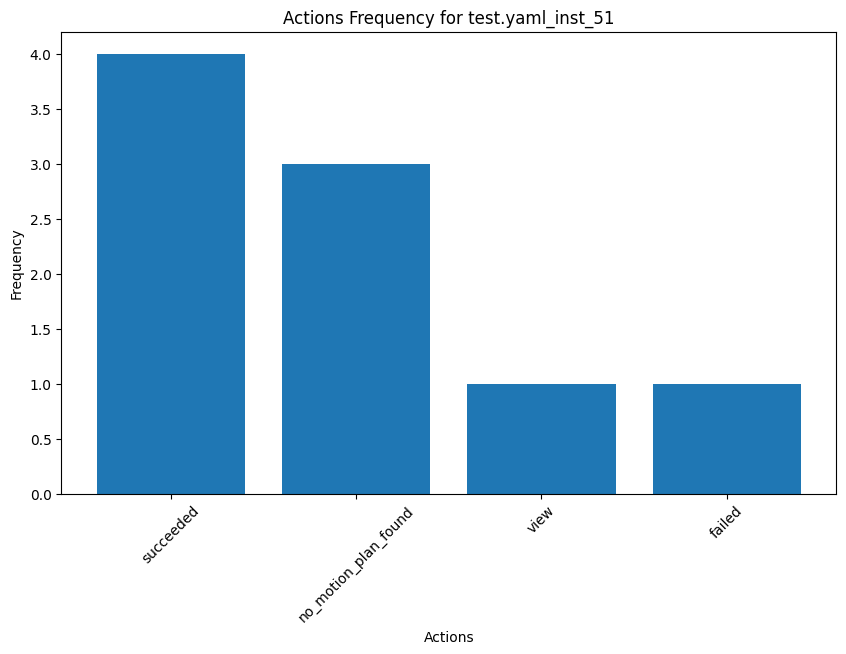

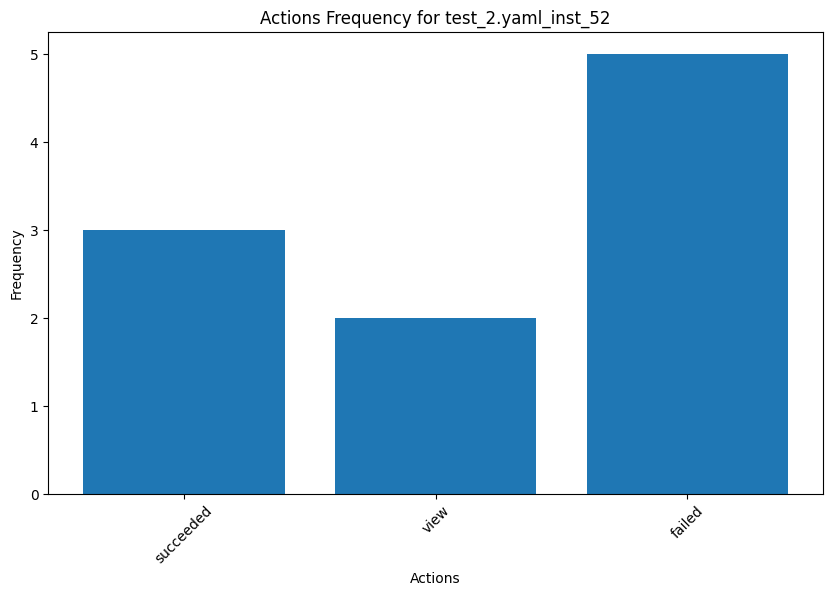

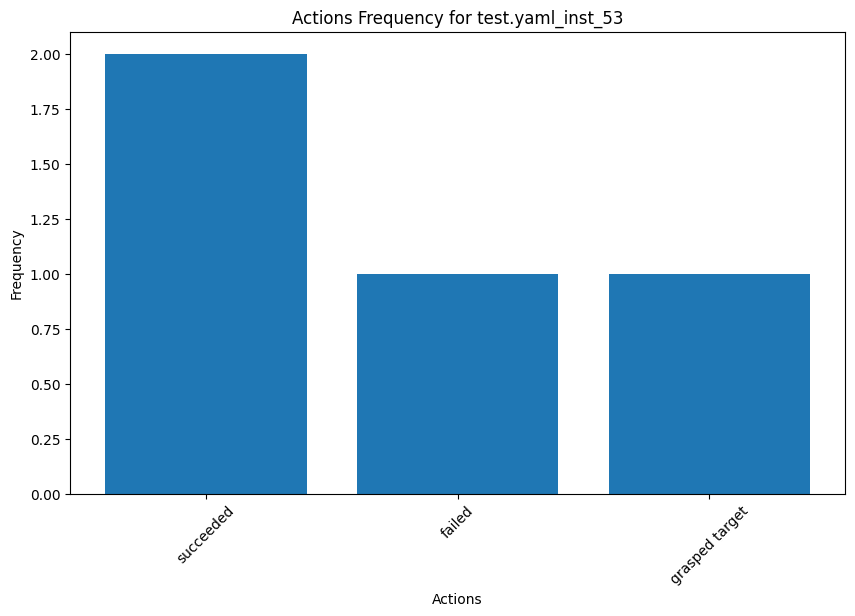

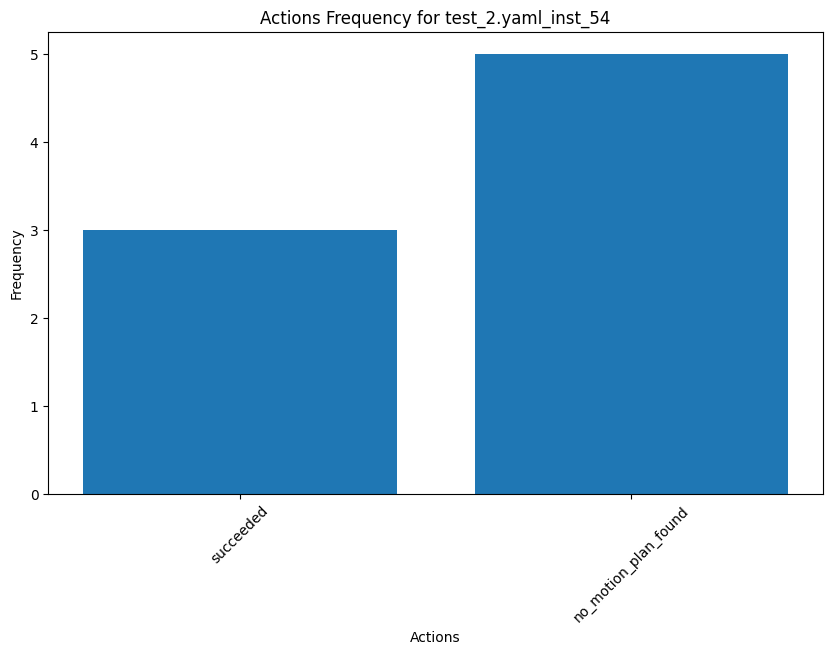

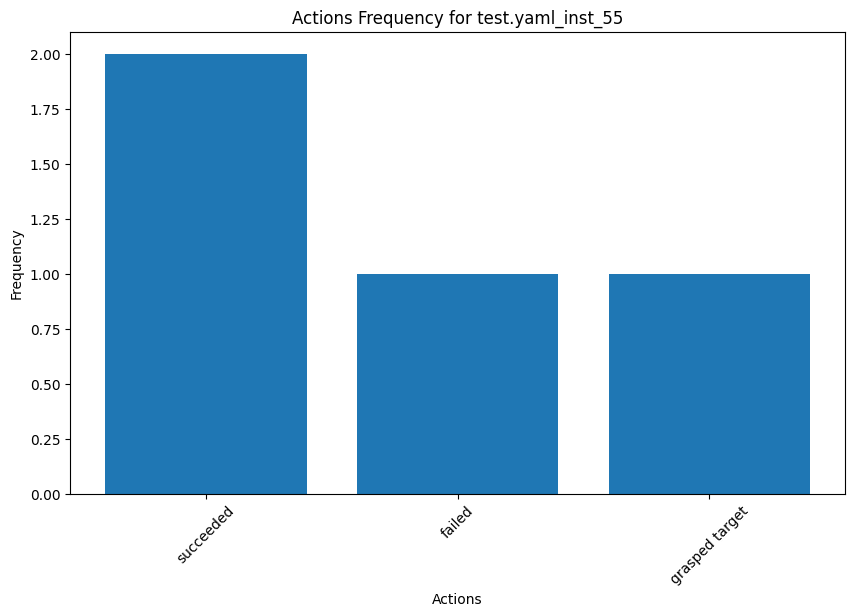

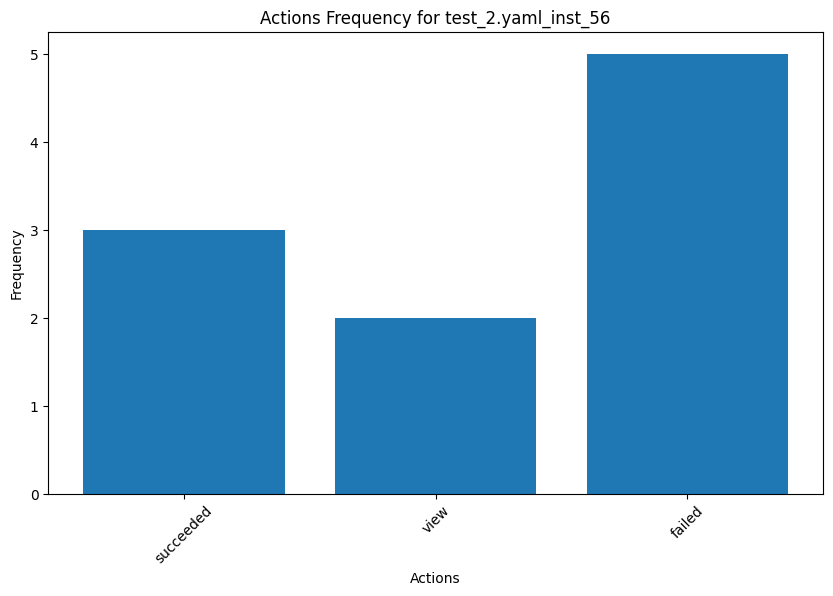

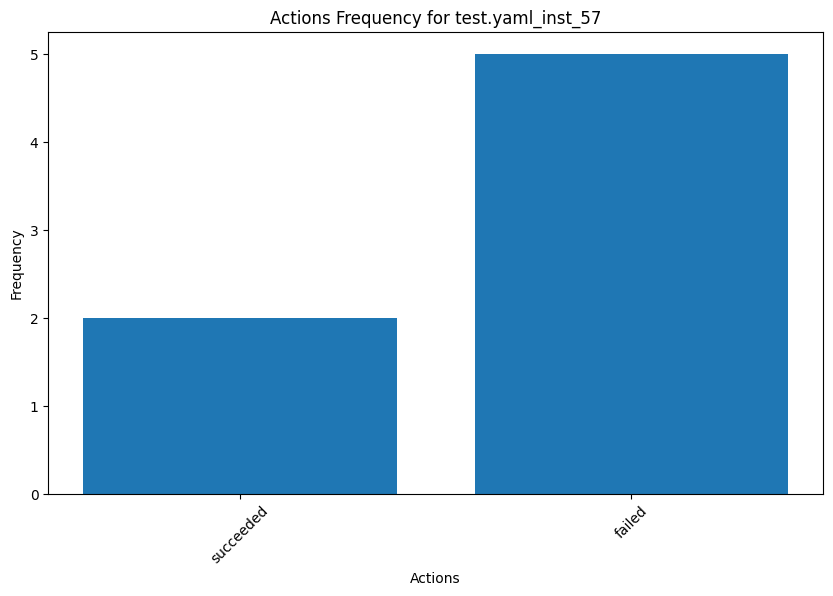

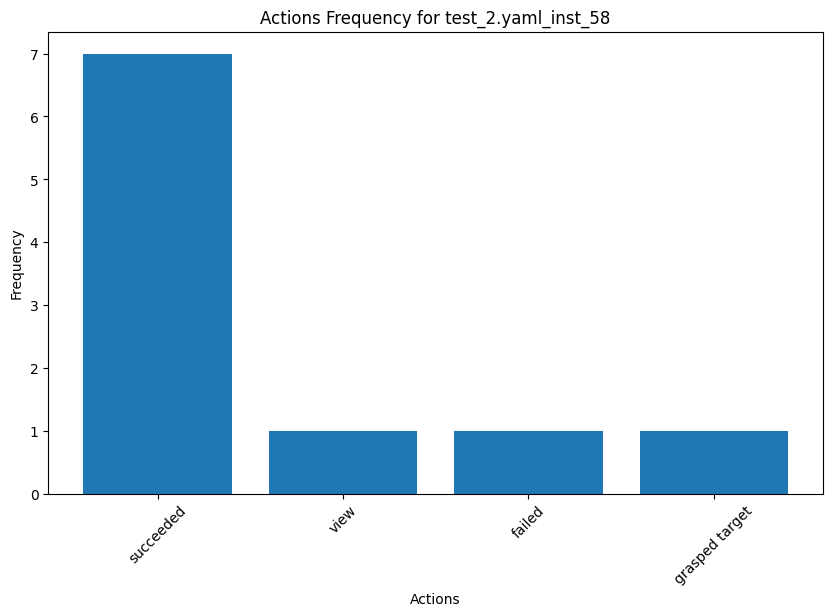

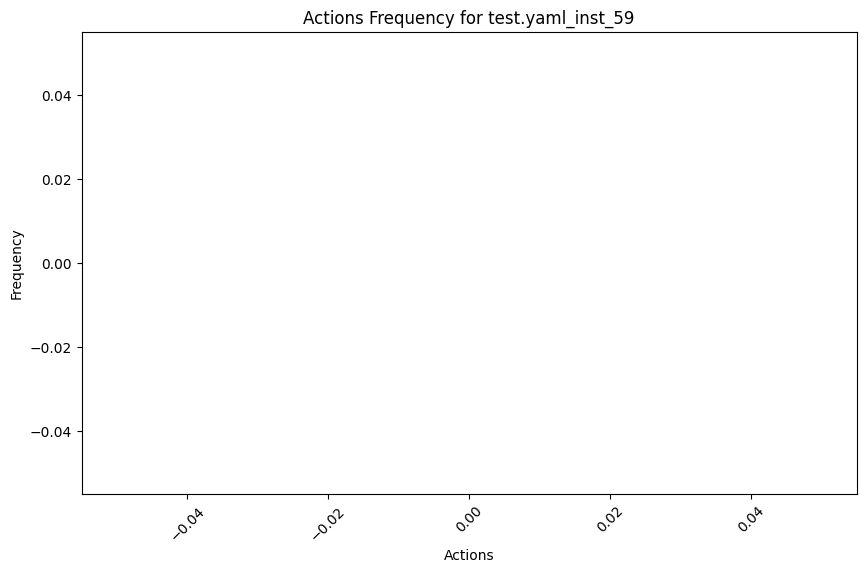

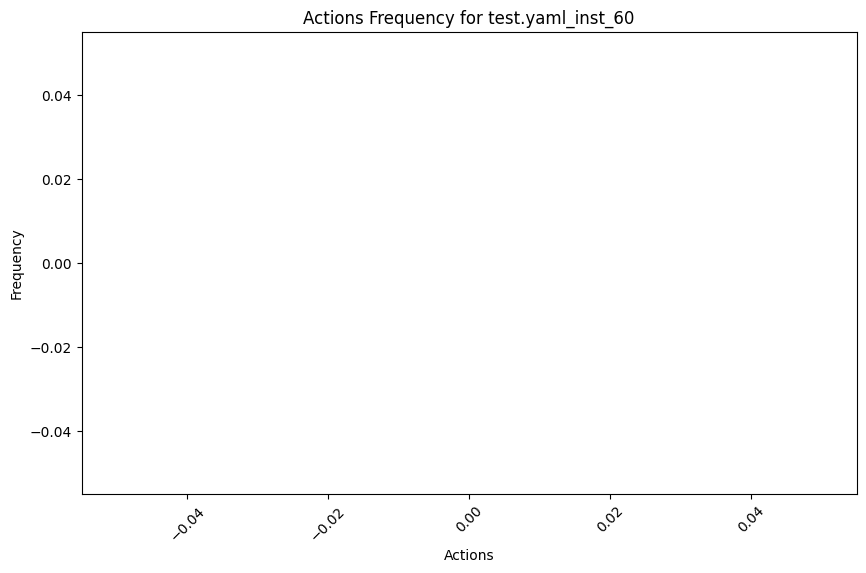

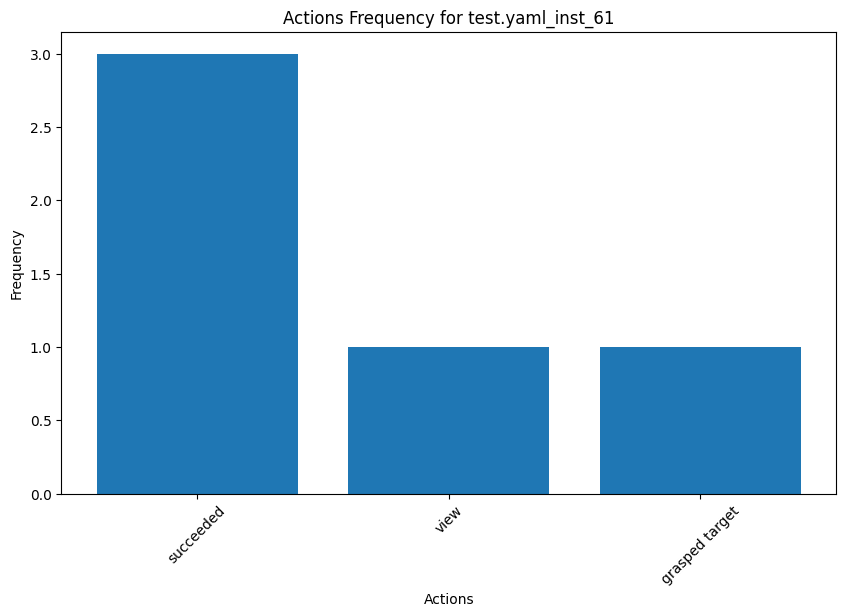

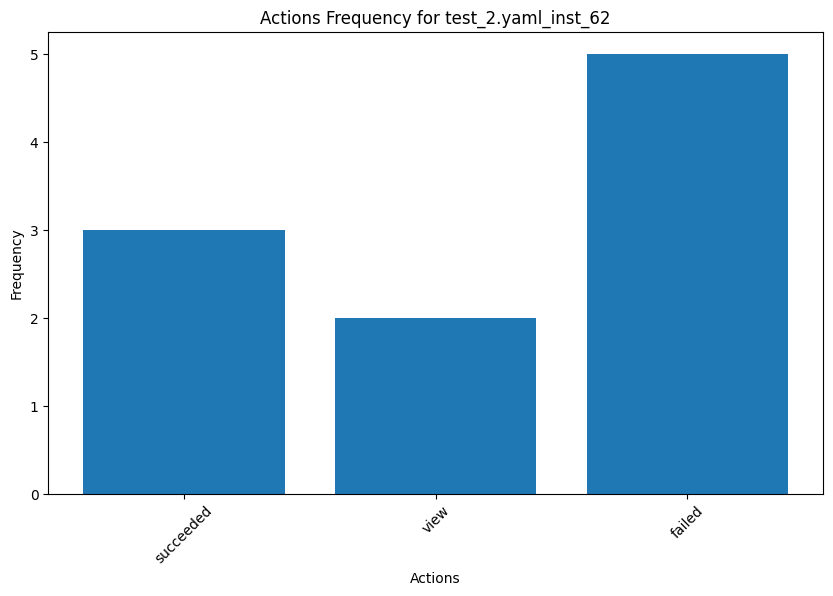

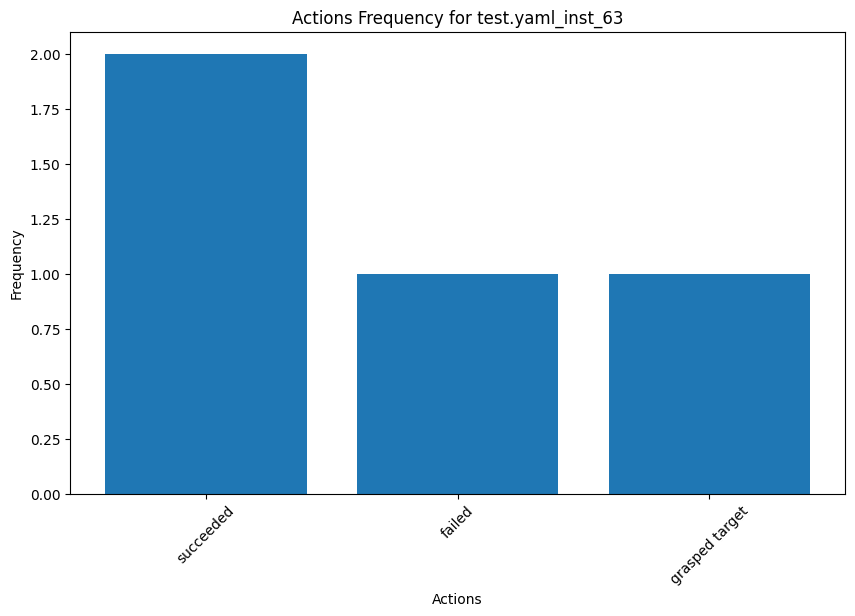

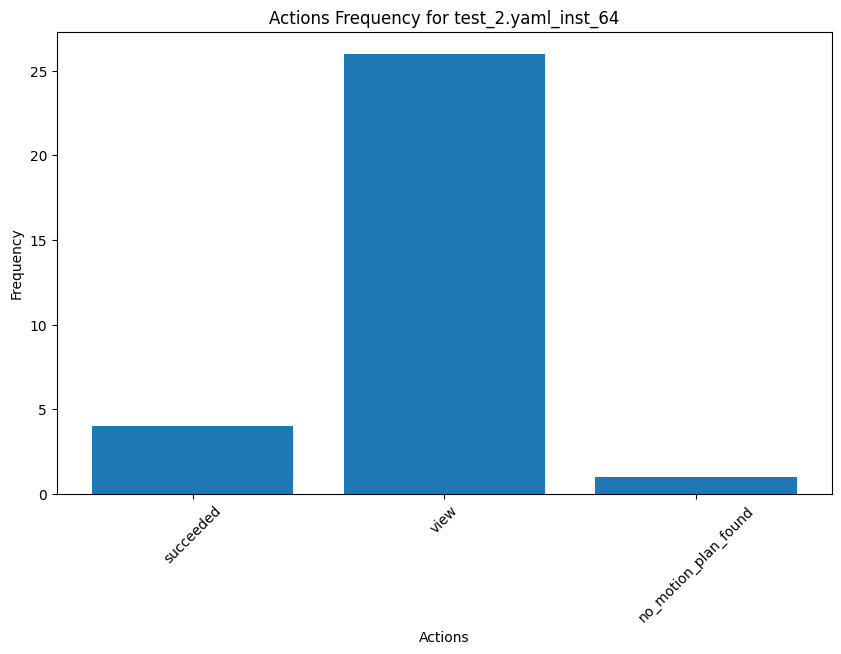

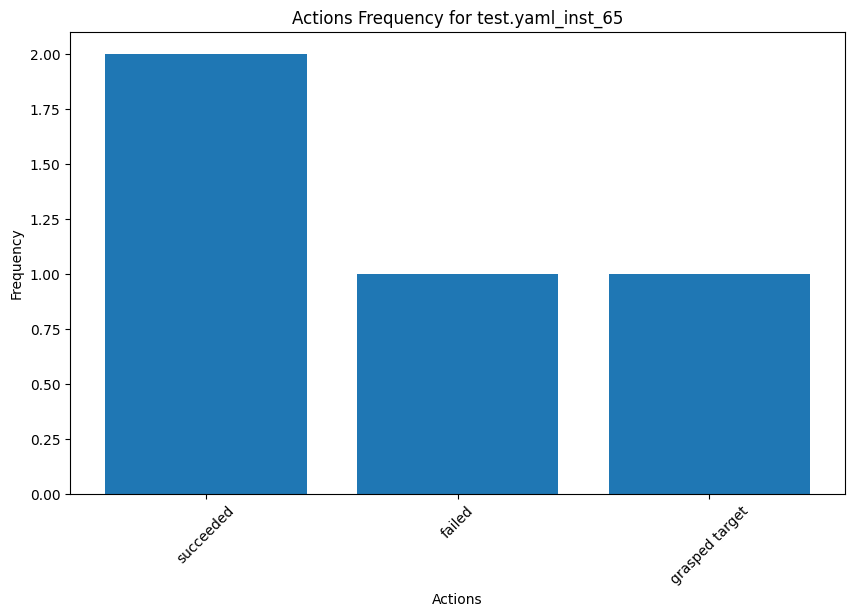

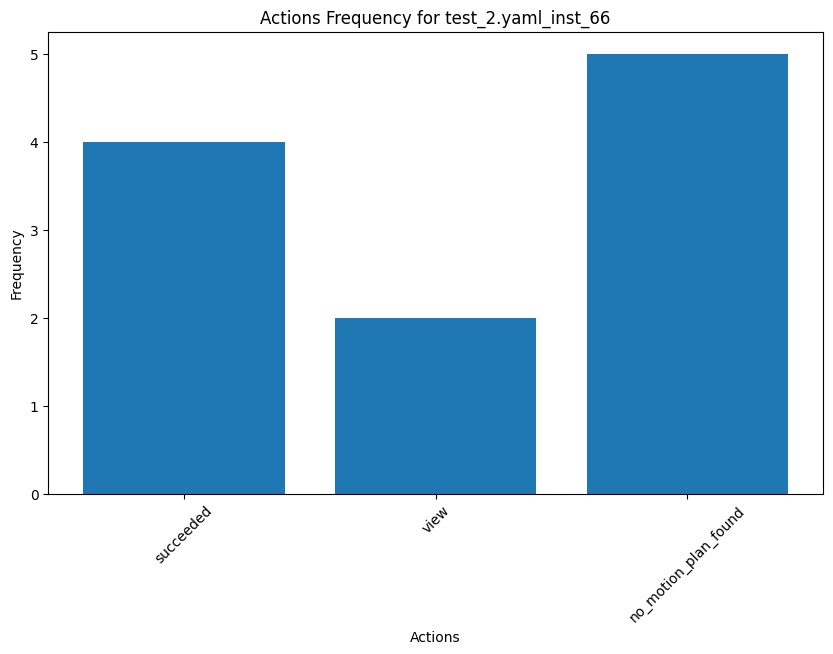

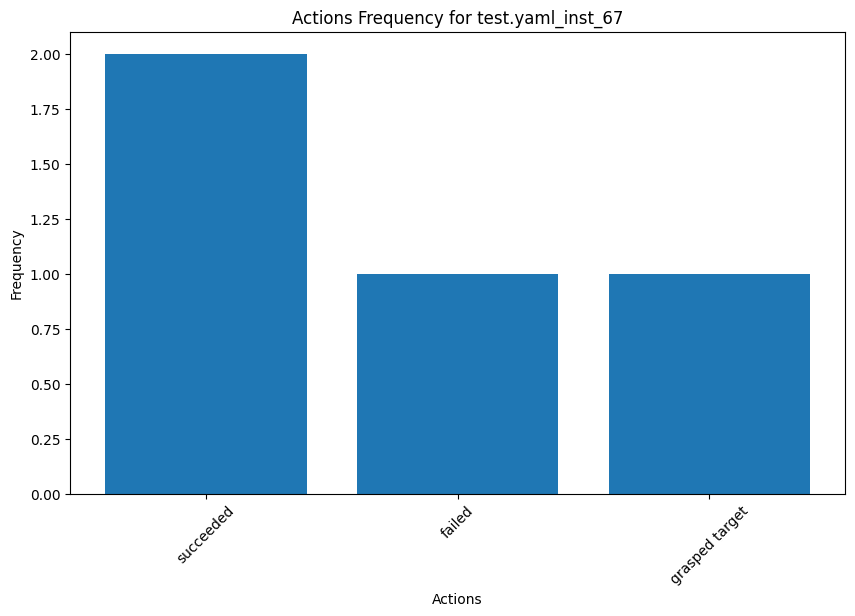

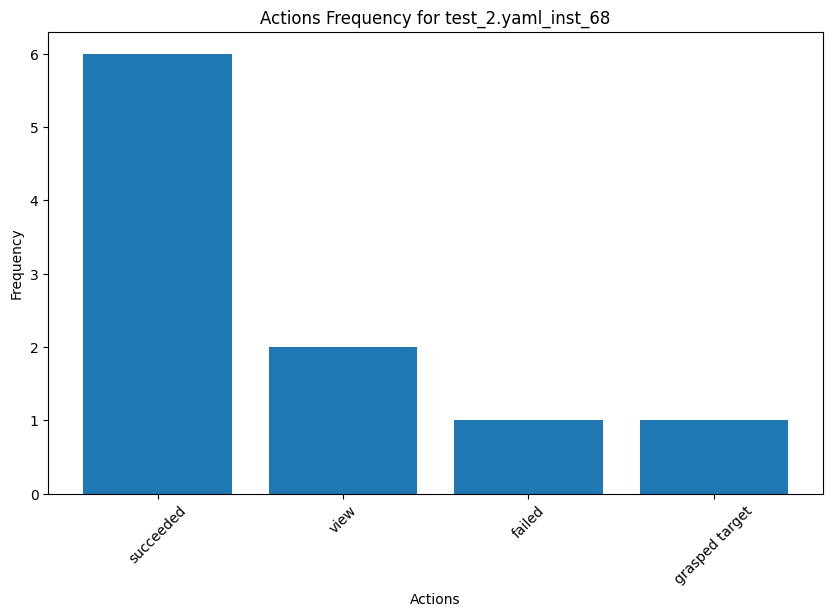

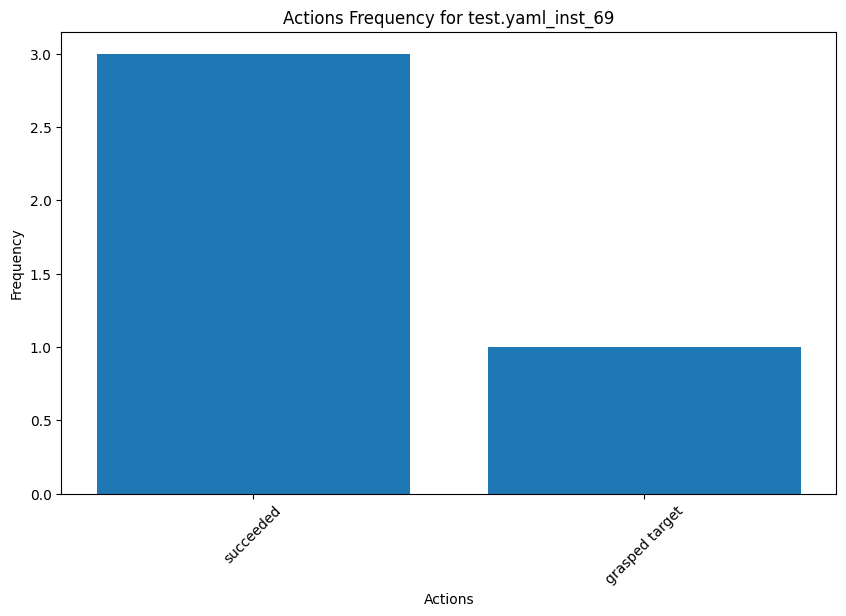

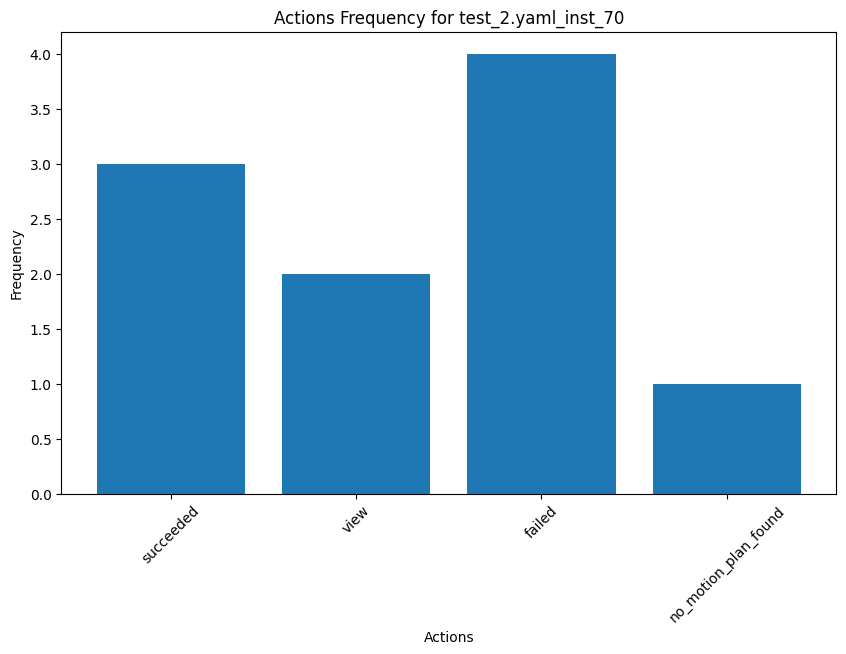

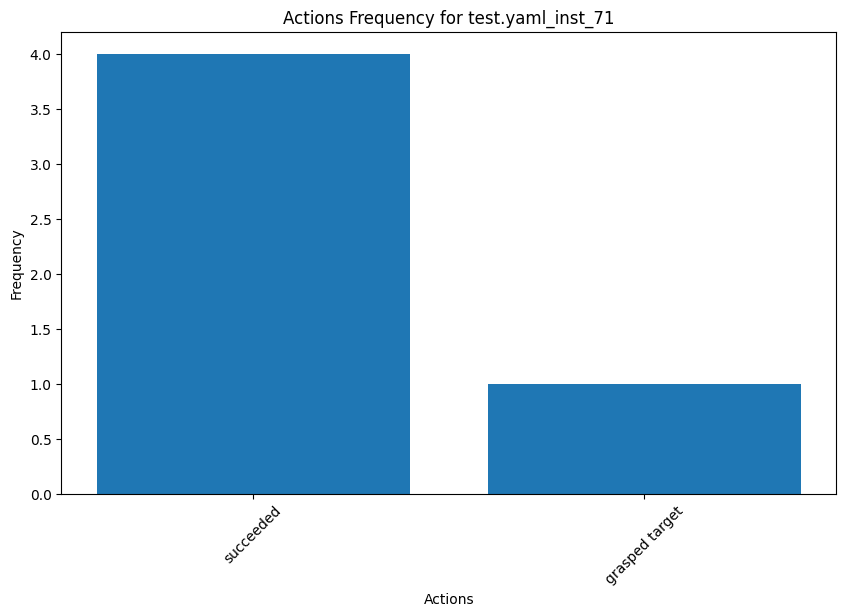

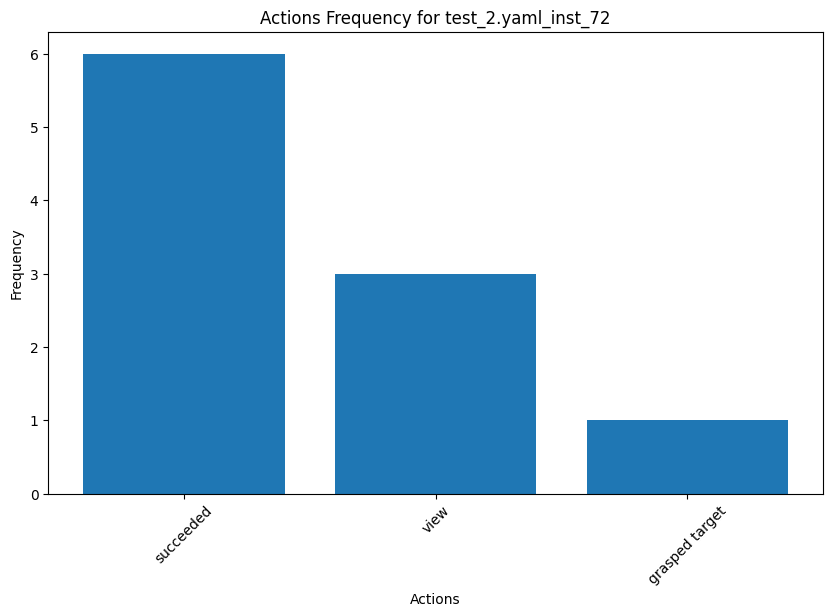

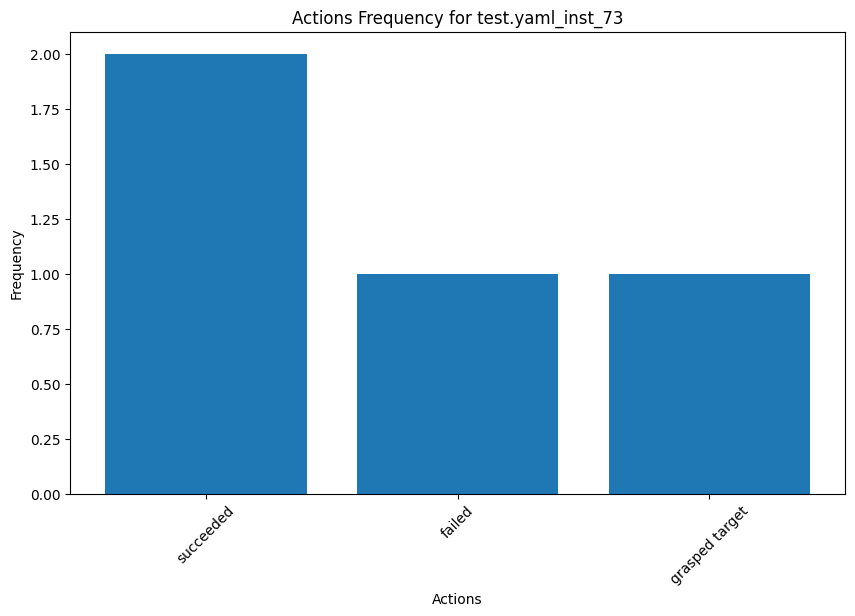

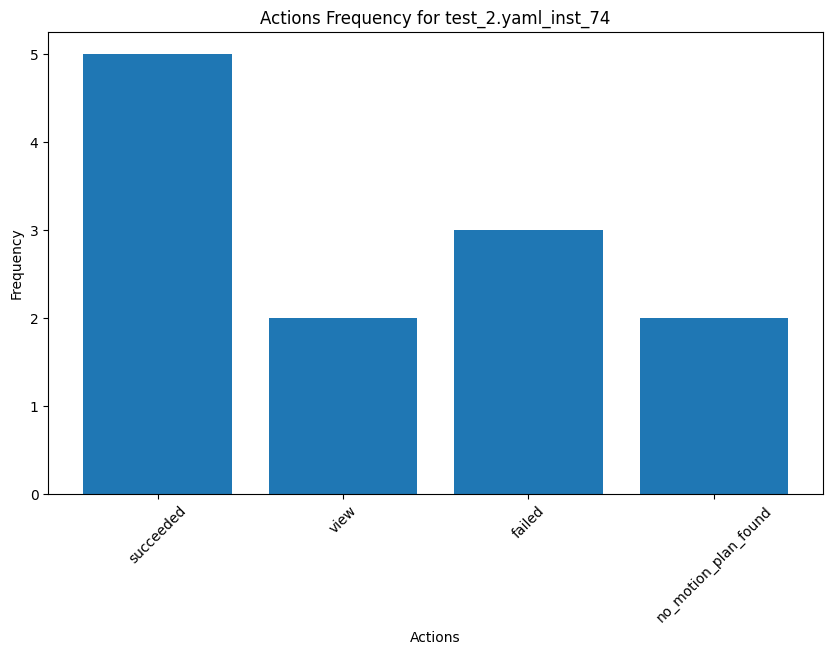

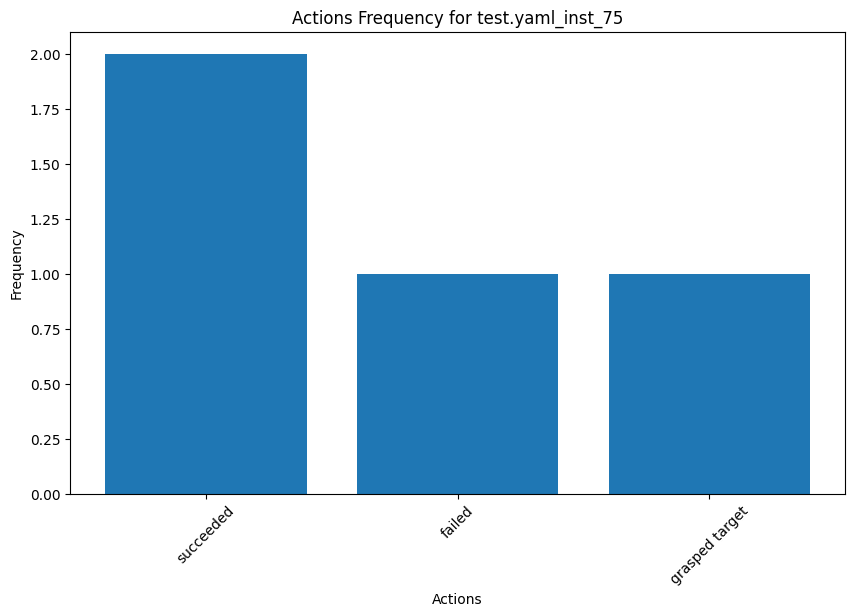

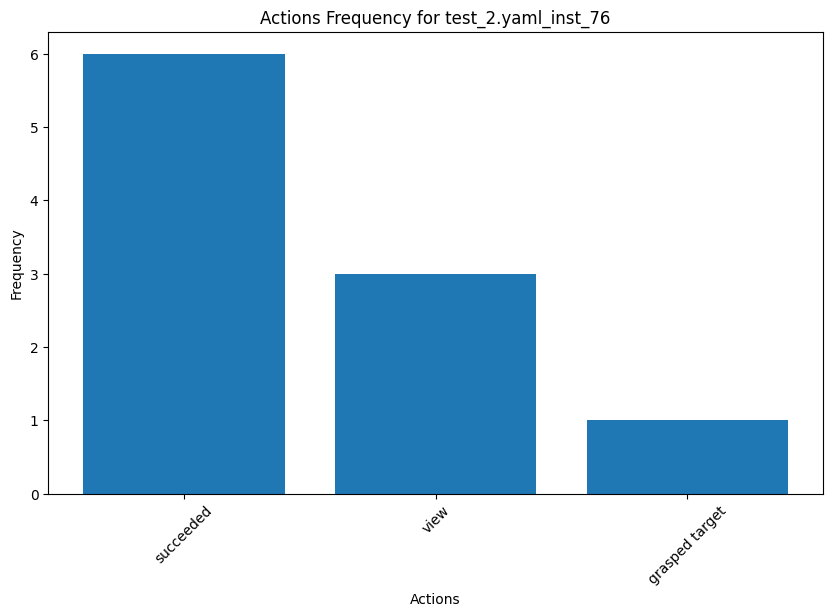

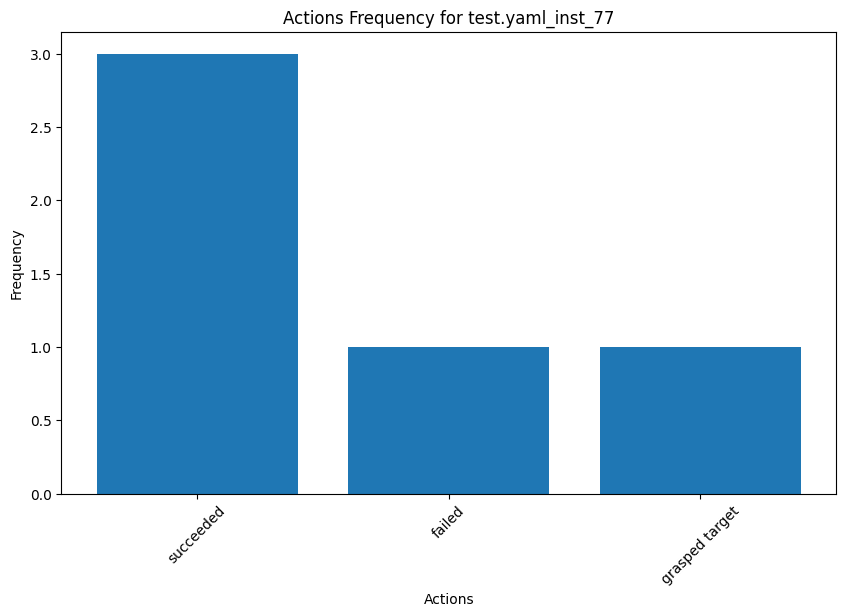

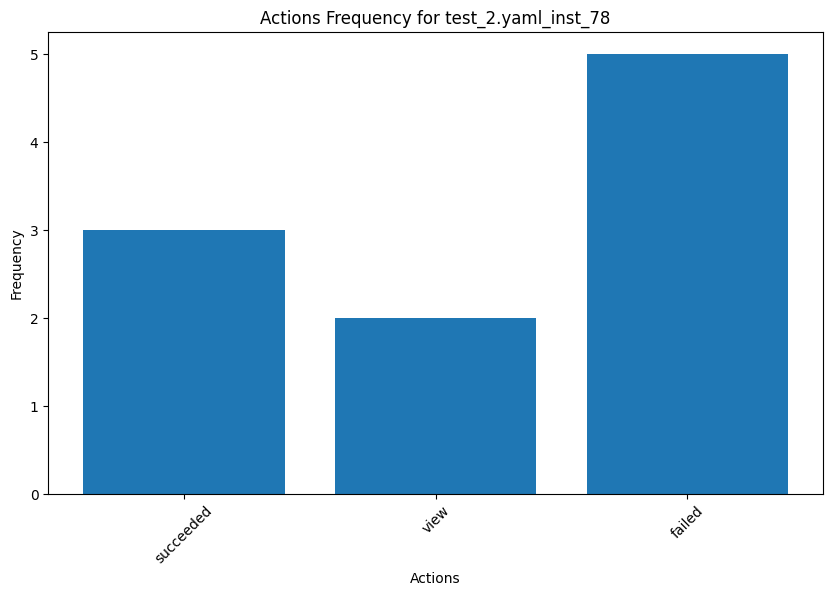

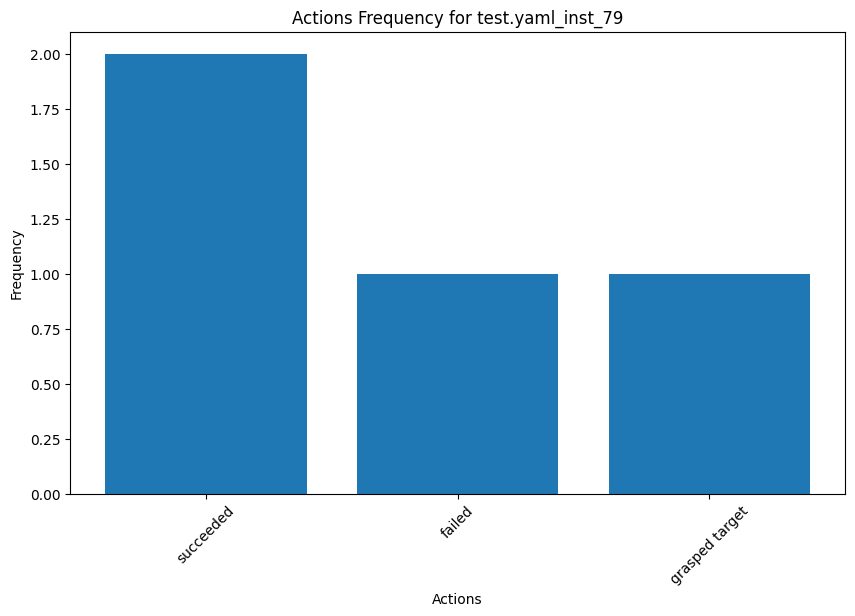

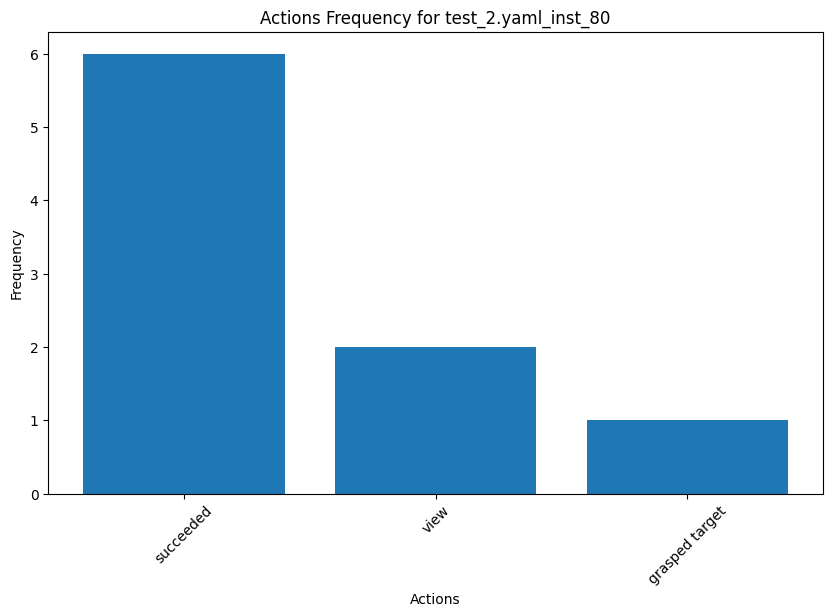

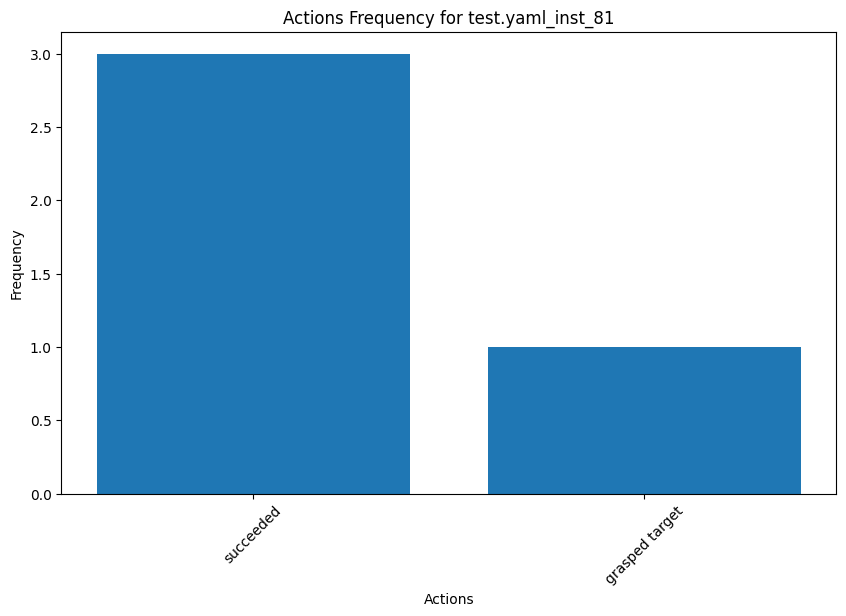

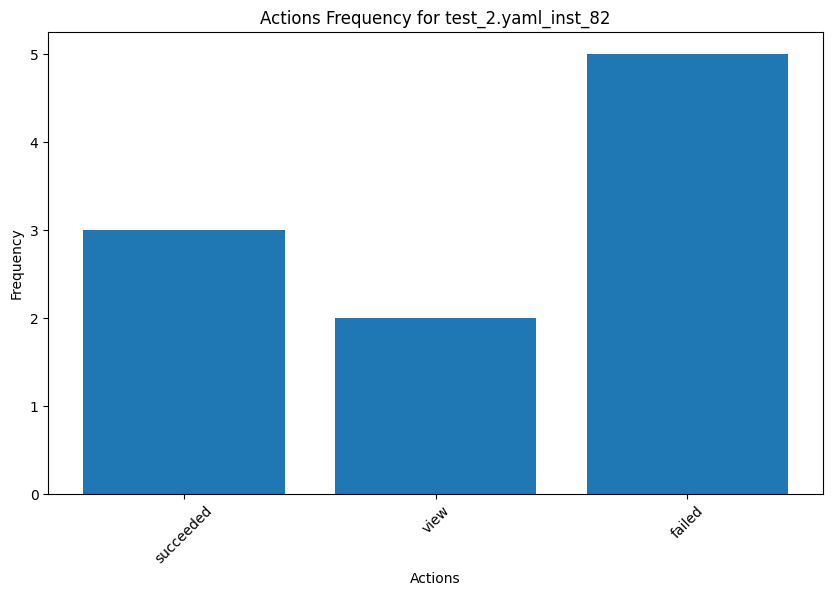

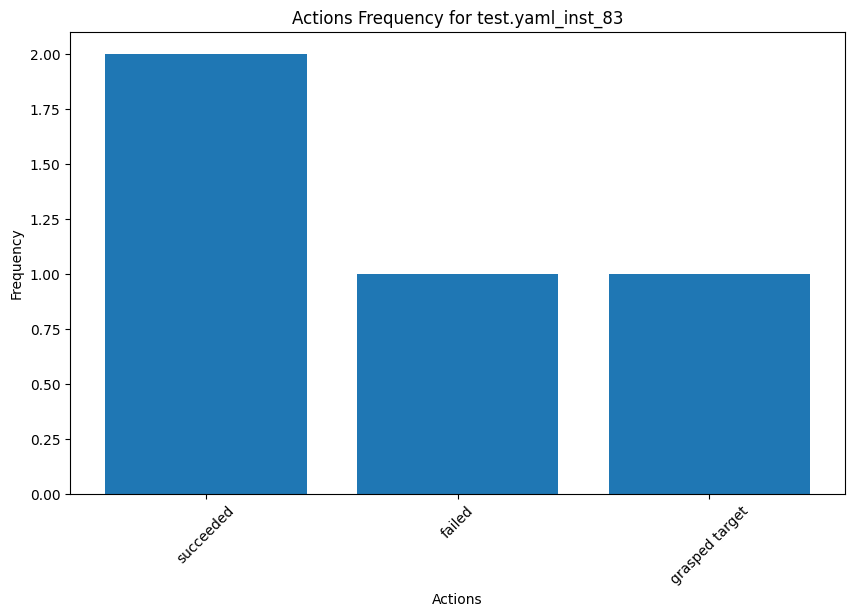

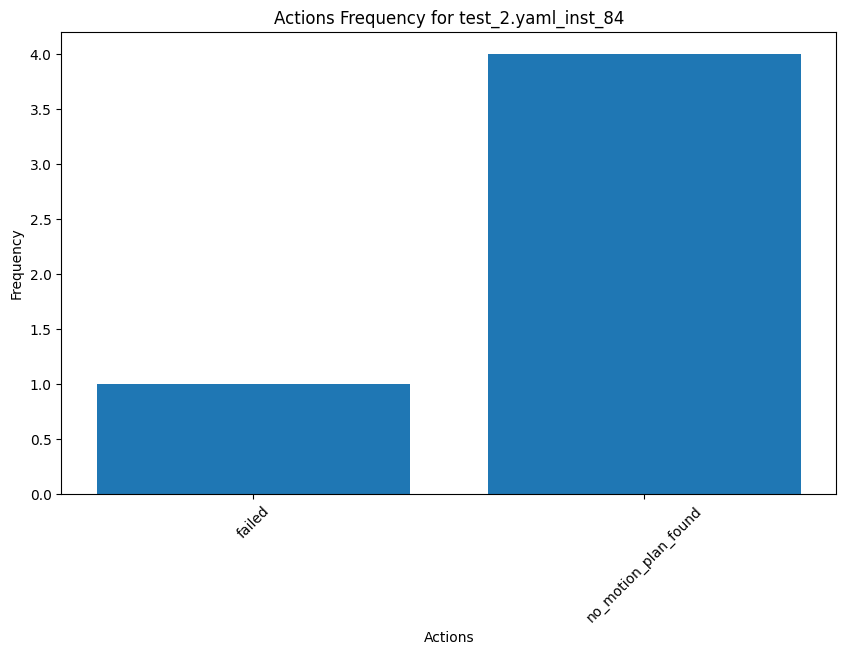

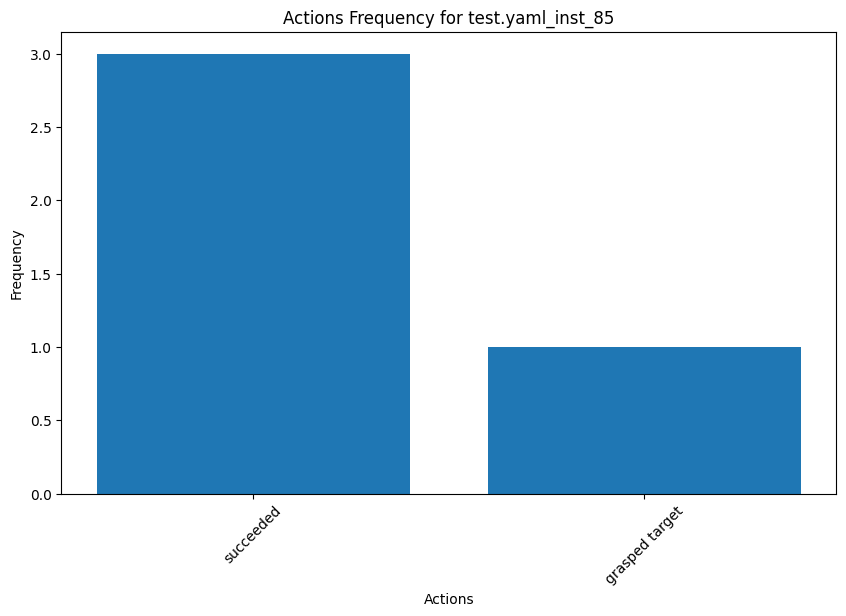

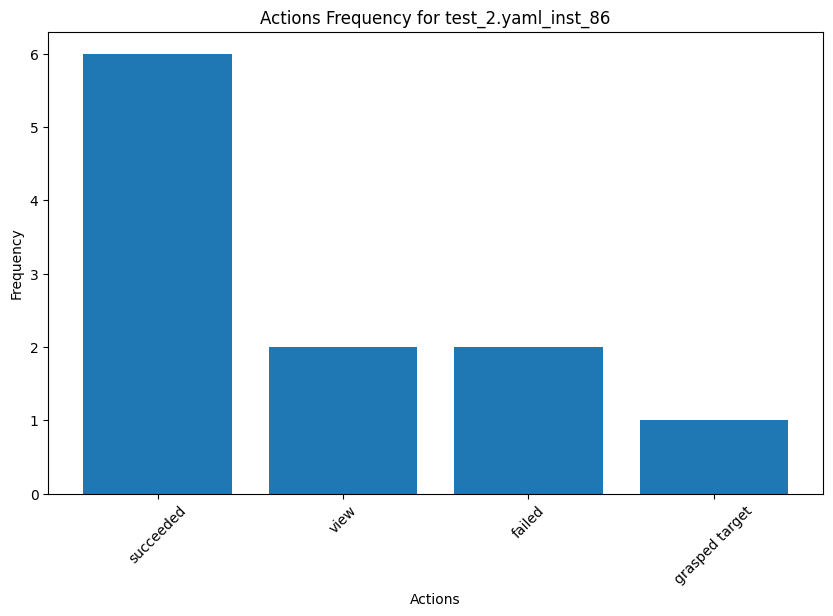

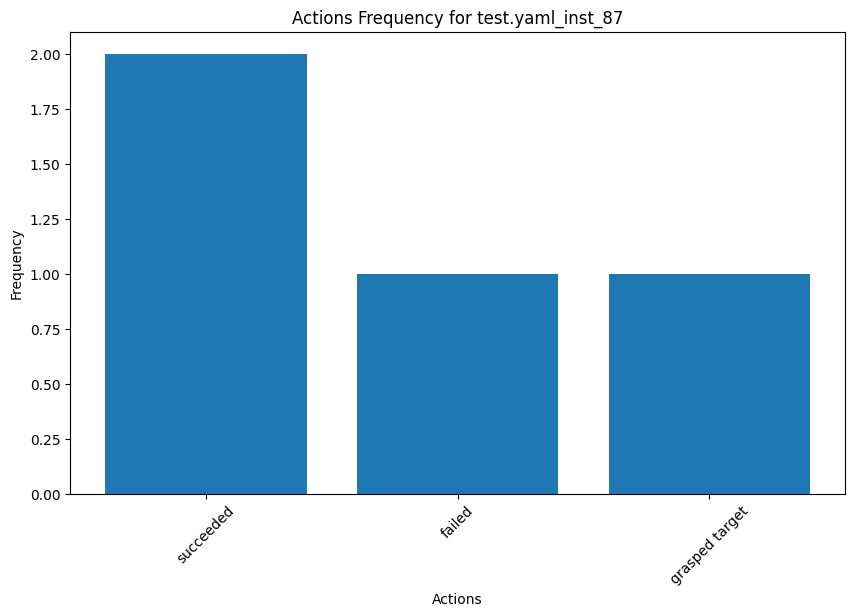

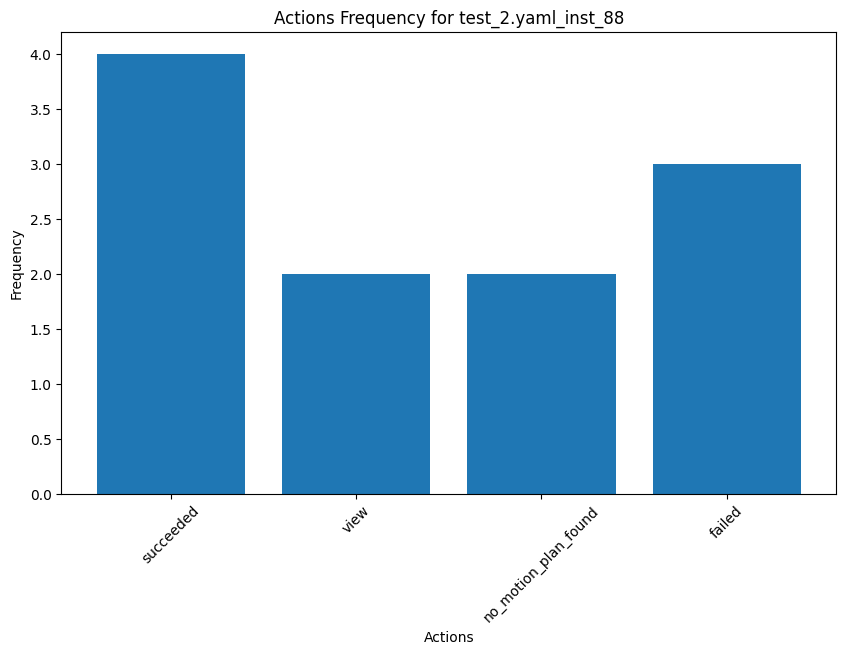

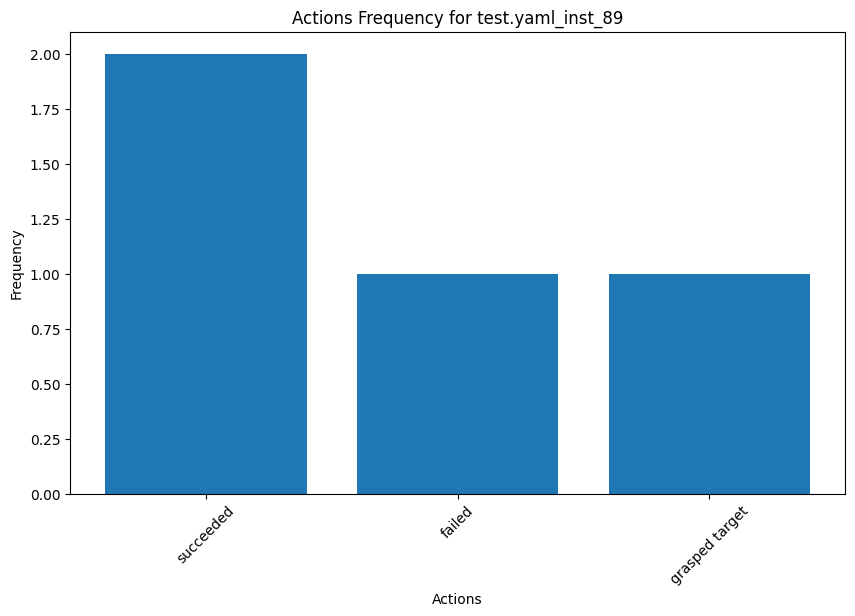

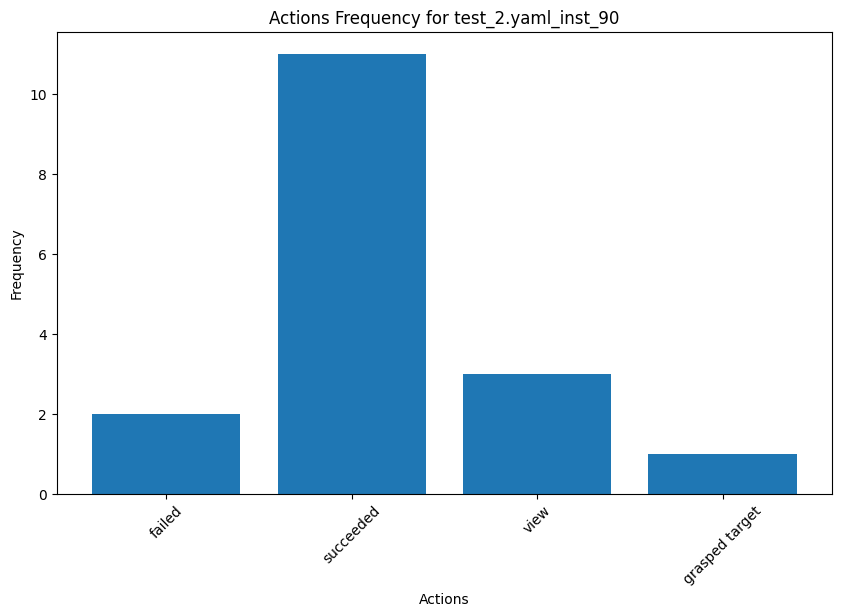

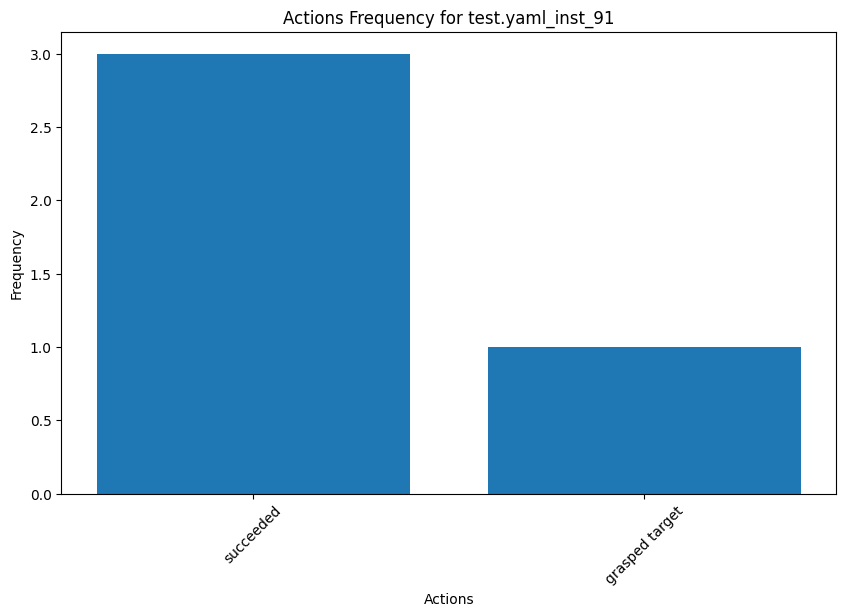

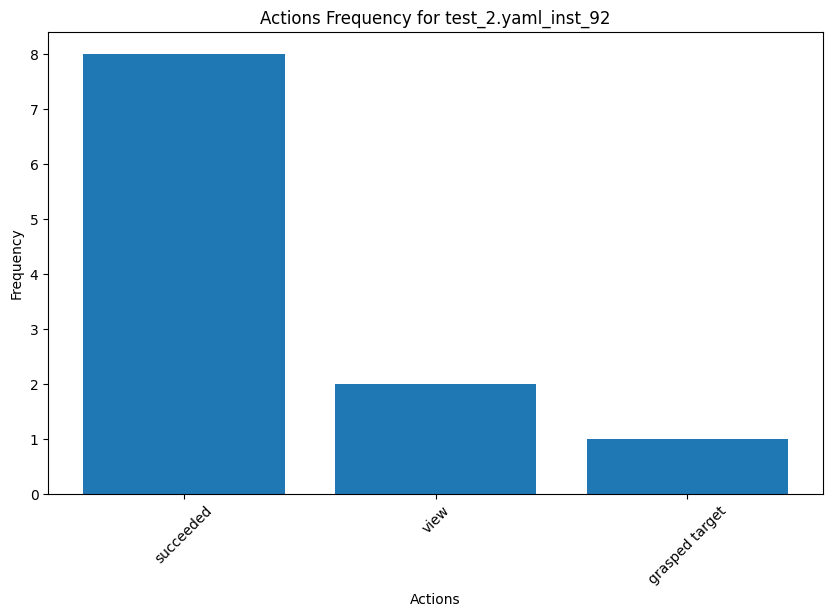

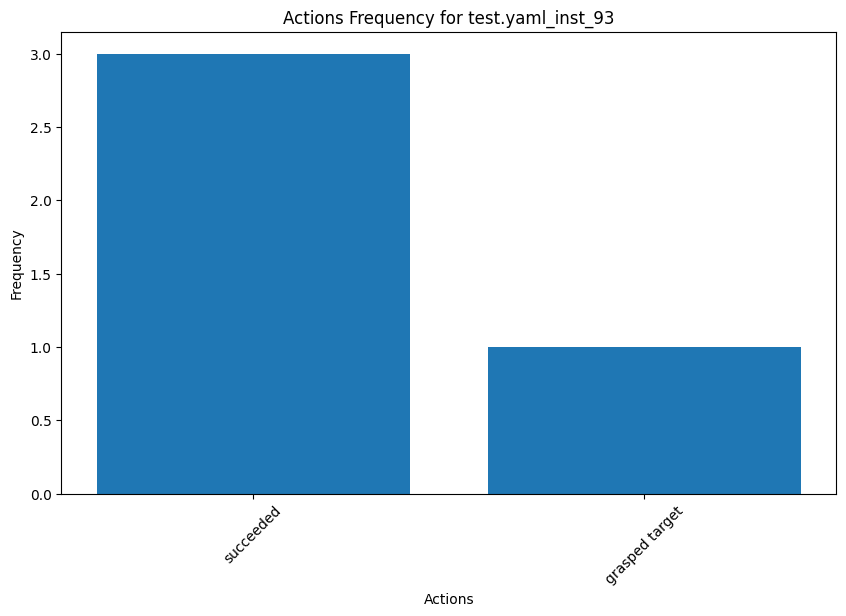

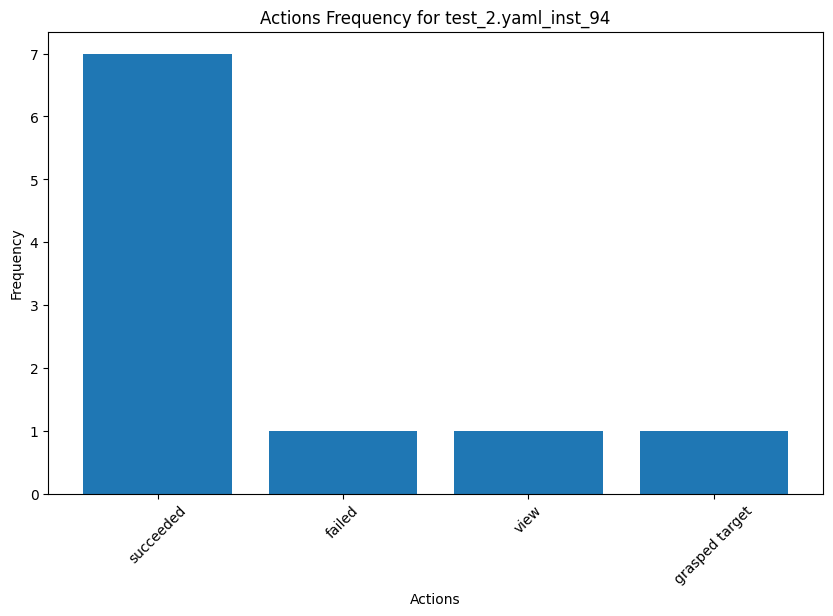

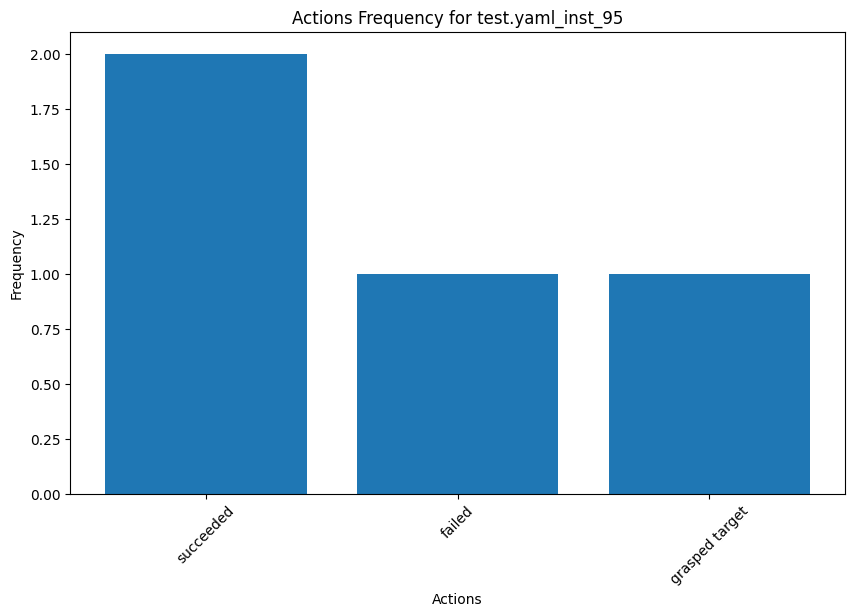

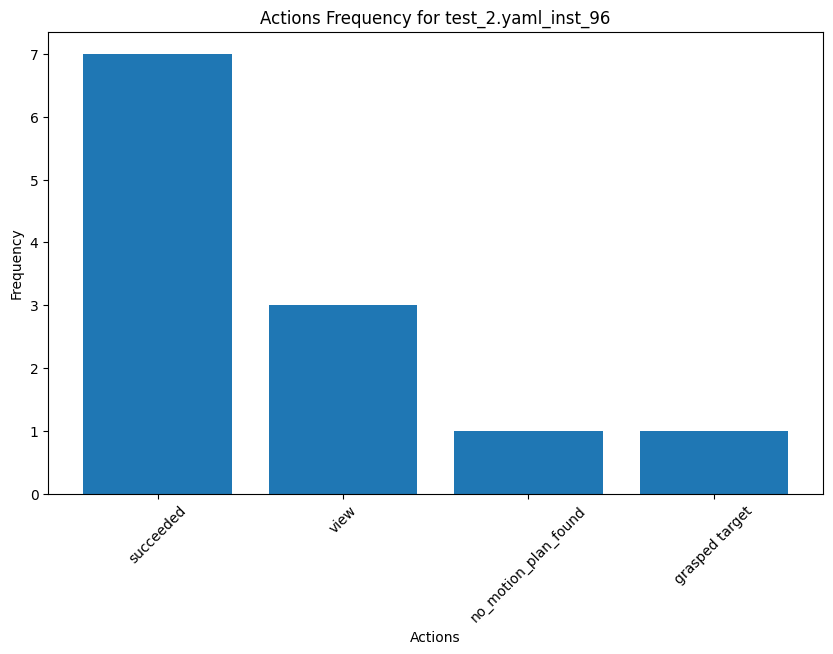

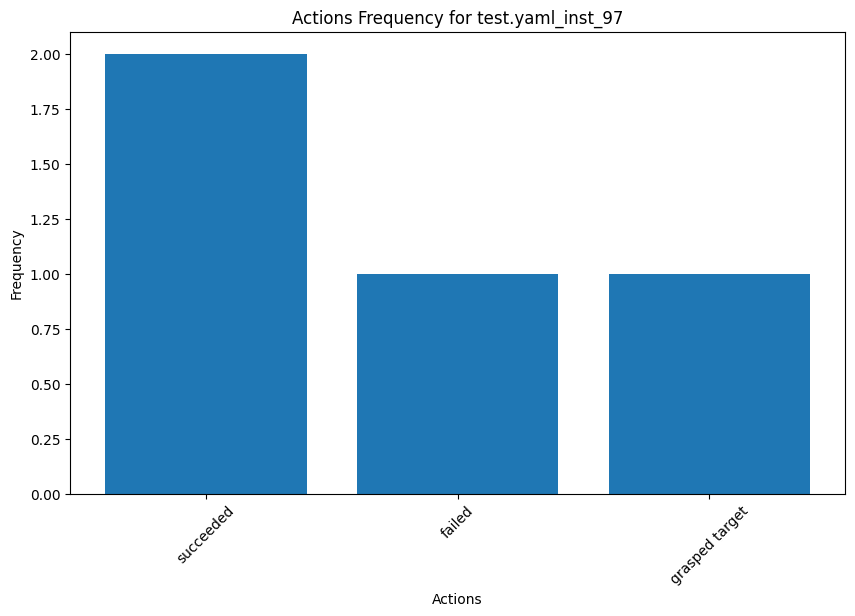

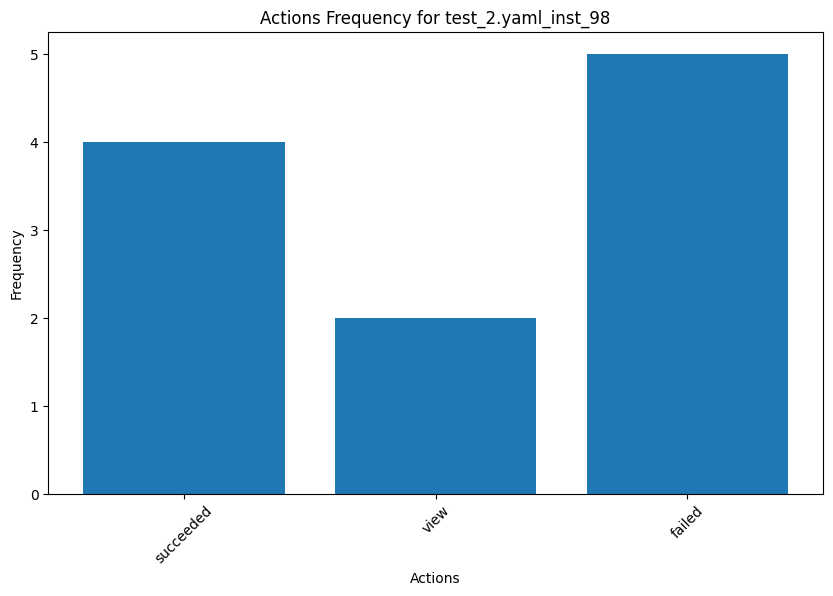

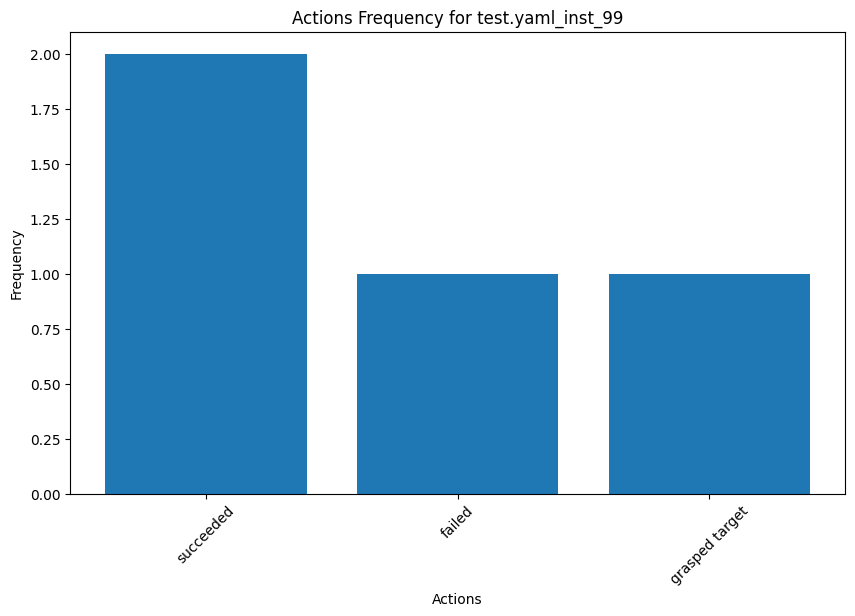

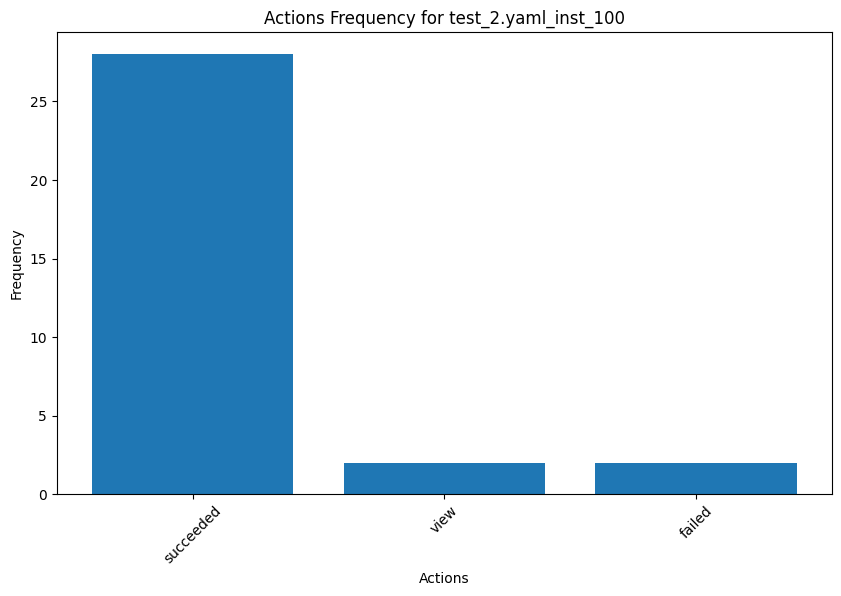

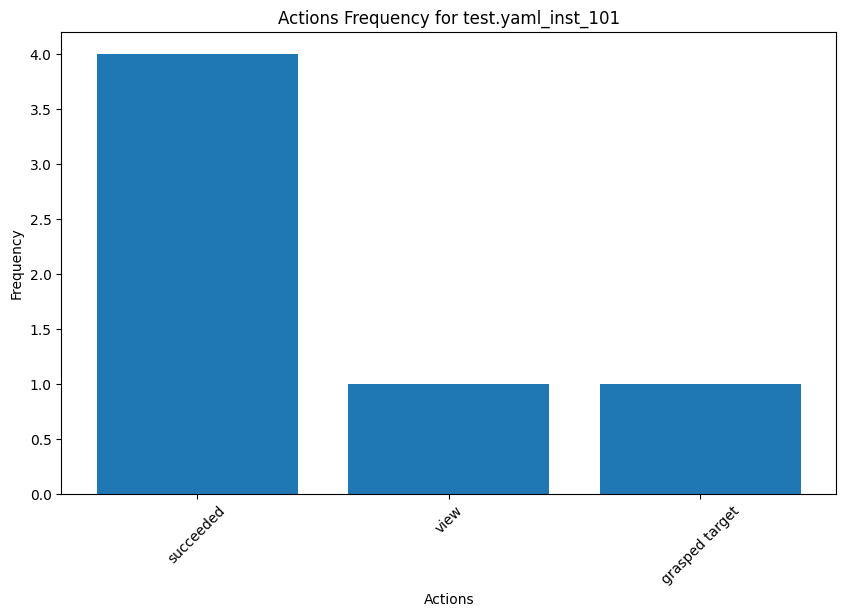

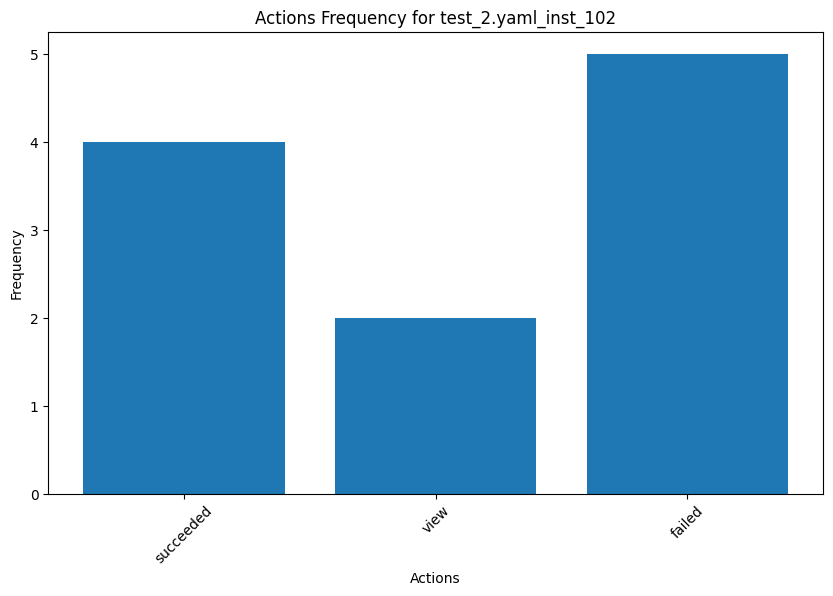

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

# Initialize a dictionary to store the action counts for each test scene
test_scene_counts = {}

# Count the frequency of each action for each test scene
for test_scene, actions in test_scene_actions.items():
    action_counts = Counter(actions)
    test_scene_counts[test_scene] = action_counts

# Create a bar chart for each test scene
for test_scene, action_counts in test_scene_counts.items():
    actions = list(action_counts.keys())
    counts = list(action_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(actions, counts)
    plt.xlabel('Actions')
    plt.ylabel('Frequency')
    plt.title(f'Actions Frequency for {test_scene}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [16]:
# Step 2: Create a time series for each action within each test scene
time_series_data = []
scene_labels = []

for scene in df['Scene'].unique():
    scene_data = df[df['Scene'] == scene]
    action_counts = scene_data['Action'].value_counts().to_dict()
    time_series_data.append(action_counts)
    scene_labels.append(scene)

print(scene_labels)
print(time_series_data)

# Step 3: Create a time-series plot
plt.figure(figsize=(12, 8))

for scene_data in time_series_data:
    for action, frequency in scene_data.items():
        if action not in plt.gca().lines:
            plt.plot([], label=action)

x_ticks_positions = list(range(len(time_series_data)))
x_ticks_labels = [scene_labels[i] if i == 0 else '' for i in x_ticks_positions]

for scene_data in time_series_data:
    for action in plt.gca().lines:
        action_name = action.get_label()
        frequencies = [scene_data.get(action_name, 0) for scene_data in time_series_data]
        action.set_ydata(frequencies)

plt.xlabel('Test Scenes')
plt.ylabel('Frequency')
plt.title('Action Frequency Time Series')
plt.xticks(x_ticks_positions, x_ticks_labels, rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

[nan, 'test.yaml', 'test_2.yaml']
[{}, {'succeeded': 71, 'test.yaml': 31, 'no_motion_plan_found': 31, 'failed': 28, 'grasped target': 21, 'view': 5}, {'succeeded': 182, 'failed': 88, 'view': 75, 'test_2.yaml': 29, 'no_motion_plan_found': 28, 'grasped target': 4}]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (3,).

Error in callback <function _draw_all_if_interactive at 0x7f03462da5e0> (for post_execute):


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (3,).

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (3,).

<Figure size 1200x800 with 1 Axes>

Compute timings

In [ ]:
view_generation = df.view_generation / df.view_count
state_update = df.state_update / df.view_count
tsdf_update = df.tsdf_integration / df.view_count
grasp_prediction = df.grasp_prediction / df.view_count
grasp_selection = df.grasp_selection / df.view_count
ig_computation = df.ig_computation / df.view_count

print(f"View generation: {view_generation.mean():.3f}")
print(f"State update: {state_update.mean():.3f}")
print(f"  TSDF update: {tsdf_update.mean():.3f}")
print(f"  Grasp prediction: {grasp_prediction.mean():.3f}")
print(f"  Grasp selection: {grasp_selection.mean():.3f}")
print(f"IG computation: {ig_computation.mean():.3f}")
print("---")
print(f"Total time: {view_generation.mean() + state_update.mean() + ig_computation.mean():.3f}")